In [216]:
#pip install graphviz
import pandas as pd
import numpy as np
import sys
pd.set_option("display.max_columns",200)

https://www.cs.tufts.edu/~nr/cs257/archive/jack-good/weight-of-evidence.pdf
https://christophm.github.io/interpretable-ml-book/logistic.html

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [217]:
df=pd.read_csv("/content/gdrive/MyDrive/Diplomado/G21-M1/Data/transformacion_entropica/default of credit card clients_1.csv")

**Variable binaria, pago (No = 1, Si = 0), como variable de respuesta.**

- X1: Monto del crédito otorgado (dólar NT)
- X2: Sexo (1 = hombre; 2 = mujer).
- X3: Educación (1 = posgrado; 2 = universidad; 3 = bachillerato; 4 = otros).
- X4: Estado civil (1 = casado; 2 = soltero; 3 = otros).
- X5: Edad (año).
- X6 - X11: Historial de pagos pasados. Realizamos un seguimiento de los registros de pagos mensuales anteriores (de abril a septiembre de 2005) de la siguiente manera: X6 = el estado de pago en septiembre de 2005; X7 = el estado de reembolso en agosto de 2005; . . .; X11 = el estado de reembolso en abril de 2005. La escala de medición para el estado de reembolso es: -1 = pagar debidamente; 1 = retraso en el pago durante un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.
- X12-X17: Monto del extracto de la factura (dólar NT). X12 = monto del estado de cuenta en septiembre de 2005; X13 = monto del estado de cuenta en agosto de 2005; . . .; X17 = monto del estado de cuenta en abril de 2005.
- X18-X23: Monto del pago anterior (dólar NT). X18 = monto pagado en septiembre de 2005; X19 = monto pagado en agosto de 2005; . . .; X23 = monto pagado en abril de 2005.

In [218]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,payment delay for 2 months,payment delay for 2 months,pay duly,pay duly,Non use,Non use,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,pay duly,payment delay for 2 months,use,use,use,payment delay for 2 months,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,use,use,use,use,use,use,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,use,use,use,use,use,use,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,6,50000,male,graduate school,single,37,use,use,use,use,use,use,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [5]:
## Cambiamos la target
#0- No paga
#1- Paga

In [219]:
df["default payment next month"]=df["default payment next month"].replace({1:0,0:1})

## <h1 style="color:orange">Evento -- 1 (PAGA)  NO Evento --- 0 (NO PAGA)</h1>

In [220]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,payment delay for 2 months,payment delay for 2 months,pay duly,pay duly,Non use,Non use,3913,3102,689,0,0,0,0,689,0,0,0,0,0
1,2,120000,female,university,single,26,pay duly,payment delay for 2 months,use,use,use,payment delay for 2 months,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,3,90000,female,university,single,34,use,use,use,use,use,use,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
3,4,50000,female,university,married,37,use,use,use,use,use,use,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
4,6,50000,male,graduate school,single,37,use,use,use,use,use,use,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,1


In [8]:
df.shape

(25692, 25)

In [221]:
df["default payment next month"].value_counts(1)

1    0.761132
0    0.238868
Name: default payment next month, dtype: float64

In [222]:
bar=my_bar_count(df,"default payment next month",title="TARGET")
bar.show(renderer="colab")

## <h1 style="color:orange">DUPLICADOS </h1>

In [223]:
df.duplicated(subset=["ID"]).sum()

0

## <h1 style="color:orange">RENOMBRAR COLUMNAS </h1>

In [224]:
c_=["LIMIT_BAL","AGE","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]
v_=["SEX","EDUCATION","MARRIAGE","PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
id_=["ID"]

df=rename_cols(df,c_,"c_")
df=rename_cols(df,v_,"v_")
df=rename_cols(df,id_,"id_")
df.rename(columns={"default payment next month":"tgt"},inplace=True)

## <h1 style="color:orange">COMPLETITUD </h1>

In [225]:
df

,id_ID,c_LIMIT_BAL,v_SEX,v_EDUCATION,v_MARRIAGE,c_AGE,v_PAY_1,v_PAY_2,v_PAY_3,v_PAY_4,v_PAY_5,v_PAY_6,c_BILL_AMT1,c_BILL_AMT2,c_BILL_AMT3,c_BILL_AMT4,c_BILL_AMT5,c_BILL_AMT6,c_PAY_AMT1,c_PAY_AMT2,c_PAY_AMT3,c_PAY_AMT4,c_PAY_AMT5,c_PAY_AMT6,tgt
0,1,20000,female,university,married,24,payment delay for 2 months,payment delay for 2 months,pay duly,pay duly,Non use,Non use,3913,3102,689,0,0,0,0,689,0,0,0,0,0
1,2,120000,female,university,single,26,pay duly,payment delay for 2 months,use,use,use,payment delay for 2 months,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,3,90000,female,university,single,34,use,use,use,use,use,use,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
3,4,50000,female,university,married,37,use,use,use,use,use,use,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
4,6,50000,male,graduate school,single,37,use,use,use,use,use,use,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25687,29993,10000,male,high school,married,43,use,use,use,Non use,Non use,Non use,8802,10400,0,0,0,0,2000,0,0,0,0,0,1
25688,29995,80000,male,university,single,34,payment delay for 2 months,payment delay for 2 months,payment delay for 2 months,payment delay for 2 months,payment delay for 2 months,payment delay for 2 months,72557,77708,79384,77519,82607,81158,7000,3500,0,7000,0,4000,0
25689,29997,150000,male,high school,single,43,pay duly,pay duly,pay duly,pay duly,use,use,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,1
25690,29998,30000,male,university,single,37,Others,Others,payment delay for 2 months,pay duly,use,use,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,0


In [226]:
completitud(df)

,columna,total,completitud
0,v_MARRIAGE,46,99.820956
1,id_ID,0,100.000000
2,c_PAY_AMT5,0,100.000000
3,c_PAY_AMT4,0,100.000000
4,c_PAY_AMT3,0,100.000000
5,c_PAY_AMT2,0,100.000000
6,c_PAY_AMT1,0,100.000000
7,c_BILL_AMT6,0,100.000000
8,c_BILL_AMT5,0,100.000000
9,c_BILL_AMT4,0,100.000000


## <h1 style="color:orange">CONTINUAS A DISCRETAS </h1>

In [227]:
df.filter(like="c_")

,c_LIMIT_BAL,c_AGE,c_BILL_AMT1,c_BILL_AMT2,c_BILL_AMT3,c_BILL_AMT4,c_BILL_AMT5,c_BILL_AMT6,c_PAY_AMT1,c_PAY_AMT2,c_PAY_AMT3,c_PAY_AMT4,c_PAY_AMT5,c_PAY_AMT6
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,37,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25687,10000,43,8802,10400,0,0,0,0,2000,0,0,0,0,0
25688,80000,34,72557,77708,79384,77519,82607,81158,7000,3500,0,7000,0,4000
25689,150000,43,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
25690,30000,37,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100


In [228]:
his=histogram(df,"c_AGE",13,"c_AGE")
his.show(renderer="colab")

In [229]:
df["c_AGE"].describe(percentiles=np.arange(.1,1.1,.1))

count    25692.000000
mean        35.419975
std          9.336112
min         21.000000
10%         25.000000
20%         27.000000
30%         29.000000
40%         31.000000
50%         34.000000
60%         37.000000
70%         40.000000
80%         44.000000
90%         49.000000
100%        79.000000
max         79.000000
Name: c_AGE, dtype: float64

In [233]:
pd.cut(df["c_AGE"], bins = 5).astype(str).value_counts(1)

(20.942, 32.6]    0.451619
(32.6, 44.2]      0.370504
(44.2, 55.8]      0.148412
(55.8, 67.4]      0.027791
(67.4, 79.0]      0.001674
Name: c_AGE, dtype: float64

In [234]:
df[df["c_AGE"]>67]["tgt"].value_counts()

1    32
0    11
Name: tgt, dtype: int64

In [235]:
his=histogram(df,"c_LIMIT_BAL",13,"c_LIMIT_BAL")
his.show(renderer="colab")

In [238]:
pd.cut(df["c_LIMIT_BAL"], bins = 10).astype(str).value_counts()

(9210.0, 89000.0]       10172
(89000.0, 168000.0]      5565
(168000.0, 247000.0]     4908
(247000.0, 326000.0]     2414
(326000.0, 405000.0]     1563
(405000.0, 484000.0]      528
(484000.0, 563000.0]      479
(563000.0, 642000.0]       38
(642000.0, 721000.0]       21
(721000.0, 800000.0]        4
Name: c_LIMIT_BAL, dtype: int64

In [239]:
df[df["c_LIMIT_BAL"]>721000.0]["tgt"].value_counts()

1    4
Name: tgt, dtype: int64

In [240]:
his=histogram(df,"c_PAY_AMT3",13,"c_PAY_AMT3")
his.show(renderer="colab")

In [241]:
pd.cut(df["c_PAY_AMT3"], bins = 3).astype(str).value_counts(1)

(-27.349, 9116.333]      0.933170
(9116.333, 18232.667]    0.055037
(18232.667, 27349.0]     0.011794
Name: c_PAY_AMT3, dtype: float64

### <h1 style="color:orange">OPCION A </h1>

In [242]:
for col in df.filter(like="c_"):
    print(pd.cut(df[col], bins = 5).astype(str).value_counts(1))
    #df[col]=pd.cut(df[col], bins = 4).astype(str)
    print(col)

(9210.0, 168000.0]      0.612525
(168000.0, 326000.0]    0.284991
(326000.0, 484000.0]    0.081387
(484000.0, 642000.0]    0.020123
(642000.0, 800000.0]    0.000973
Name: c_LIMIT_BAL, dtype: float64
c_LIMIT_BAL
(20.942, 32.6]    0.451619
(32.6, 44.2]      0.370504
(44.2, 55.8]      0.148412
(55.8, 67.4]      0.027791
(67.4, 79.0]      0.001674
Name: c_AGE, dtype: float64
c_AGE
(-12303.359, 140126.8]    0.906391
(140126.8, 291798.6]      0.079908
(291798.6, 443470.4]      0.011910
(443470.4, 595142.2]      0.001713
(595142.2, 746814.0]      0.000078
Name: c_BILL_AMT1, dtype: float64
c_BILL_AMT1
(-30635.943, 97188.6]    0.848747
(97188.6, 224377.2]      0.123268
(224377.2, 351565.8]     0.022108
(351565.8, 478754.4]     0.005216
(478754.4, 605943.0]     0.000662
Name: c_BILL_AMT2, dtype: float64
c_BILL_AMT2
(-46862.77, 101027.0]    0.868831
(101027.0, 248181.0]     0.113888
(248181.0, 395335.0]     0.015219
(395335.0, 542489.0]     0.001985
(542489.0, 689643.0]     0.000078
Name: c_BILL_

In [243]:
for col in df.filter(like="c_"):
    #print(pd.cut(df[col], bins = 3).astype(str).value_counts(1))
    df[col.replace("c_","v_equi_")]=pd.cut(df[col], bins = 3).astype(str)
    print(col)

c_LIMIT_BAL
c_AGE
c_BILL_AMT1
c_BILL_AMT2
c_BILL_AMT3
c_BILL_AMT4
c_BILL_AMT5
c_BILL_AMT6
c_PAY_AMT1
c_PAY_AMT2
c_PAY_AMT3
c_PAY_AMT4
c_PAY_AMT5
c_PAY_AMT6


In [244]:
df

,id_ID,c_LIMIT_BAL,v_SEX,v_EDUCATION,v_MARRIAGE,c_AGE,v_PAY_1,v_PAY_2,v_PAY_3,v_PAY_4,v_PAY_5,v_PAY_6,c_BILL_AMT1,c_BILL_AMT2,c_BILL_AMT3,c_BILL_AMT4,c_BILL_AMT5,c_BILL_AMT6,c_PAY_AMT1,c_PAY_AMT2,c_PAY_AMT3,c_PAY_AMT4,c_PAY_AMT5,c_PAY_AMT6,tgt,v_equi_LIMIT_BAL,v_equi_AGE,v_equi_BILL_AMT1,v_equi_BILL_AMT2,v_equi_BILL_AMT3,v_equi_BILL_AMT4,v_equi_BILL_AMT5,v_equi_BILL_AMT6,v_equi_PAY_AMT1,v_equi_PAY_AMT2,v_equi_PAY_AMT3,v_equi_PAY_AMT4,v_equi_PAY_AMT5,v_equi_PAY_AMT6
0,1,20000,female,university,married,24,payment delay for 2 months,payment delay for 2 months,pay duly,pay duly,Non use,Non use,3913,3102,689,0,0,0,0,689,0,0,0,0,0,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]"
1,2,120000,female,university,single,26,pay duly,payment delay for 2 months,use,use,use,payment delay for 2 months,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]"
2,3,90000,female,university,single,34,use,use,use,use,use,use,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]"
3,4,50000,female,university,married,37,use,use,use,use,use,use,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]"
4,6,50000,male,graduate school,single,37,use,use,use,use,use,use,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,1,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25687,29993,10000,male,high school,married,43,use,use,use,Non use,Non use,Non use,8802,10400,0,0,0,0,2000,0,0,0,0,0,1,"(9210.0, 273333.333]","(40.333, 59.667]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]"
25688,29995,80000,male,university,single,34,payment delay for 2 months,payment delay for 2 months,payment delay for 2 months,payment delay for 2 months,payment delay for 2 months,payment delay for 2 months,72557,77708,79384,77519,82607,81158,7000,3500,0,7000,0,4000,0,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]"

<h1 style="color:orange">OPCION B</h1>

In [245]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
from sklearn import tree
filterwarnings("ignore")

### Clases

In [246]:
#Edad

In [247]:
feature="c_AGE"
tgt="tgt"

In [249]:
dt = DecisionTreeClassifier(max_depth=11, min_samples_leaf=0.08, max_features=1,random_state=42)

In [250]:
df.loc[df[feature].notnull(), [feature]]

,c_AGE
0,24
1,26
2,34
3,37
4,37
...,...
25687,43
25688,34
25689,43
25690,37


In [251]:
X = df.loc[df[feature].notnull(), [feature]]

In [252]:
y = df.loc[df[feature].notnull(), tgt]

In [254]:
y

0        0
1        0
2        1
3        1
4        1
        ..
25687    1
25688    0
25689    1
25690    0
25691    0
Name: tgt, Length: 25692, dtype: int64

In [255]:
dt.fit(X, y)

DecisionTreeClassifier(max_depth=11, max_features=1, min_samples_leaf=0.08,
                       random_state=42)

In [256]:
from graphviz import Source
from sklearn import tree
tree.export_graphviz(dt, out_file='tree.dot', feature_names=X.columns)

In [257]:
tree.export_text(dt)

'|--- feature_0 <= 25.50\n|   |--- class: 1\n|--- feature_0 >  25.50\n|   |--- feature_0 <= 45.50\n|   |   |--- feature_0 <= 35.50\n|   |   |   |--- feature_0 <= 28.50\n|   |   |   |   |--- class: 1\n|   |   |   |--- feature_0 >  28.50\n|   |   |   |   |--- feature_0 <= 31.50\n|   |   |   |   |   |--- class: 1\n|   |   |   |   |--- feature_0 >  31.50\n|   |   |   |   |   |--- class: 1\n|   |   |--- feature_0 >  35.50\n|   |   |   |--- feature_0 <= 38.50\n|   |   |   |   |--- class: 1\n|   |   |   |--- feature_0 >  38.50\n|   |   |   |   |--- feature_0 <= 41.50\n|   |   |   |   |   |--- class: 1\n|   |   |   |   |--- feature_0 >  41.50\n|   |   |   |   |   |--- class: 1\n|   |--- feature_0 >  45.50\n|   |   |--- class: 1\n'

[Text(0.4444444444444444, 0.9166666666666666, 'x[0] <= 25.5\ngini = 0.364\nsamples = 25692\nvalue = [6137, 19555]'),
 Text(0.3333333333333333, 0.75, 'gini = 0.403\nsamples = 3541\nvalue = [992, 2549]'),
 Text(0.5555555555555556, 0.75, 'x[0] <= 45.5\ngini = 0.357\nsamples = 22151\nvalue = [5145, 17006]'),
 Text(0.4444444444444444, 0.5833333333333334, 'x[0] <= 35.5\ngini = 0.347\nsamples = 18111\nvalue = [4049, 14062]'),
 Text(0.2222222222222222, 0.4166666666666667, 'x[0] <= 28.5\ngini = 0.337\nsamples = 10915\nvalue = [2339, 8576]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.346\nsamples = 3572\nvalue = [796, 2776]'),
 Text(0.3333333333333333, 0.25, 'x[0] <= 31.5\ngini = 0.332\nsamples = 7343\nvalue = [1543, 5800]'),
 Text(0.2222222222222222, 0.08333333333333333, 'gini = 0.328\nsamples = 3533\nvalue = [731, 2802]'),
 Text(0.4444444444444444, 0.08333333333333333, 'gini = 0.335\nsamples = 3810\nvalue = [812, 2998]'),
 Text(0.6666666666666666, 0.4166666666666667, 'x[0] <= 38.5\ngini = 0.36

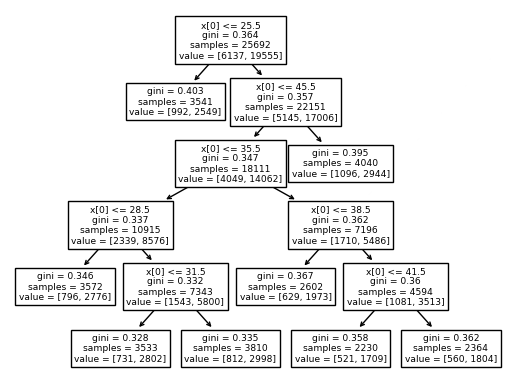

In [258]:
tree.plot_tree(dt,)

In [259]:
from matplotlib import pyplot as plt

In [260]:
df.shape

(25692, 39)

In [261]:
df["tgt"].value_counts()

1    19555
0     6137
Name: tgt, dtype: int64

In [262]:
df[df[feature]<=25.5]["tgt"].value_counts()

1    2549
0     992
Name: tgt, dtype: int64

In [263]:
dt

DecisionTreeClassifier(max_depth=11, max_features=1, min_samples_leaf=0.08,
                       random_state=42)

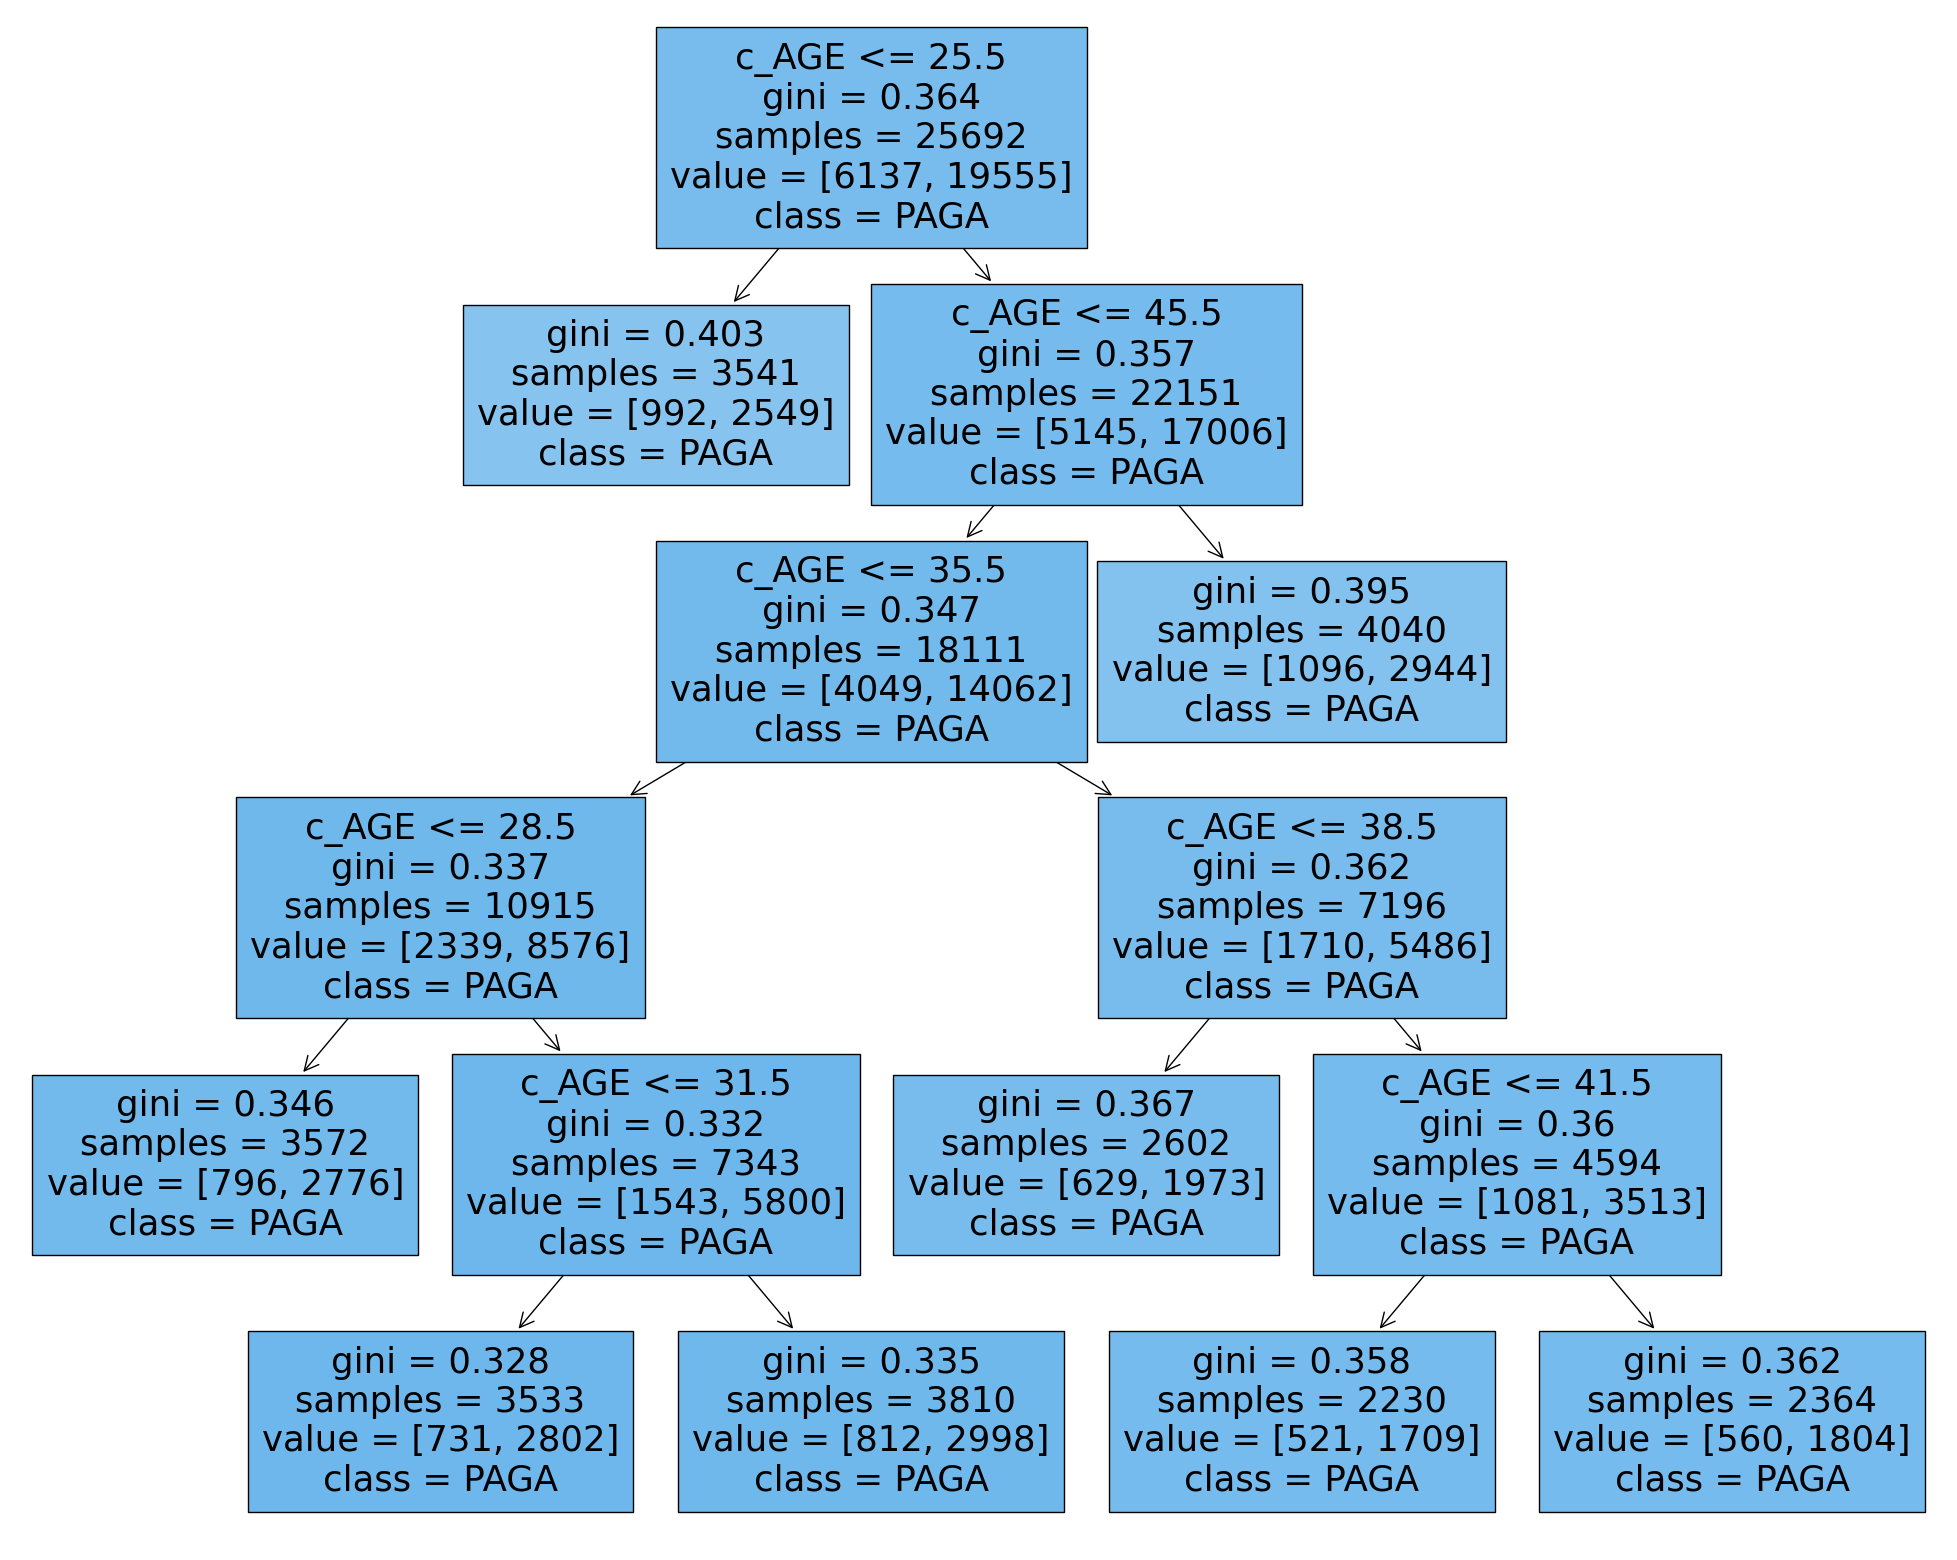

In [264]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=[feature],
                   class_names=["NO PAGA","PAGA"],
                   filled=True)

In [76]:
dt

DecisionTreeClassifier(max_depth=11, max_features=1, min_samples_leaf=0.08,
                       random_state=0)

In [265]:
df.loc[df[feature].notnull(), "aux_Age"] = dt.apply(X)

In [266]:
df["aux_Age"].value_counts()

14.0    4040
8.0     3810
5.0     3572
1.0     3541
7.0     3533
10.0    2602
13.0    2364
12.0    2230
Name: aux_Age, dtype: int64

In [267]:
df["aux_Age"].value_counts(1)

14.0    0.157247
8.0     0.148295
5.0     0.139032
1.0     0.137825
7.0     0.137514
10.0    0.101277
13.0    0.092013
12.0    0.086797
Name: aux_Age, dtype: float64

In [268]:
df[["aux_Age", feature]].groupby(["aux_Age"]).agg(["min", "max"])

c_AGE    
          min max
aux_Age          
1.0        21  25
5.0        26  28
7.0        29  31
8.0        32  35
10.0       36  38
12.0       39  41
13.0       42  45
14.0       46  79

In [271]:
aux = df[["aux_Age", feature]].groupby(["aux_Age"]).agg(["min", "max"])
aux.columns = aux.columns.droplevel(0)

In [272]:
aux

,min,max
aux_Age,,
1.0,21,25
5.0,26,28
7.0,29,31
8.0,32,35
10.0,36,38
12.0,39,41
13.0,42,45
14.0,46,79


In [273]:
aux[f"Interval_{feature}"]= aux.apply(lambda x:[x['min'],x['max']],axis=1)

In [274]:
aux

,min,max,Interval_c_AGE
aux_Age,,,
1.0,21,25,"[21, 25]"
5.0,26,28,"[26, 28]"
7.0,29,31,"[29, 31]"
8.0,32,35,"[32, 35]"
10.0,36,38,"[36, 38]"
12.0,39,41,"[39, 41]"
13.0,42,45,"[42, 45]"
14.0,46,79,"[46, 79]"


In [275]:
inter_list=aux[f"Interval_{feature}"].tolist()

In [276]:
inter_list

[[21, 25],
 [26, 28],
 [29, 31],
 [32, 35],
 [36, 38],
 [39, 41],
 [42, 45],
 [46, 79]]

In [277]:
aux[f"Interval_{feature}"]= aux.apply(lambda x:[x['min'],x['max']],axis=1)
inter_list=aux[f"Interval_{feature}"].tolist()
inter_list[0][0]=-np.Inf
inter_list[-1][-1]=np.Inf

In [278]:
inter_list

[[-inf, 25],
 [26, 28],
 [29, 31],
 [32, 35],
 [36, 38],
 [39, 41],
 [42, 45],
 [46, inf]]

In [279]:
list(map(tuple,inter_list))

[(-inf, 25),
 (26, 28),
 (29, 31),
 (32, 35),
 (36, 38),
 (39, 41),
 (42, 45),
 (46, inf)]

In [280]:
inter_list=pd.IntervalIndex.from_tuples(list(map(tuple,inter_list)),closed="both")

In [281]:
inter_list

IntervalIndex([[-inf, 25.0], [26.0, 28.0], [29.0, 31.0], [32.0, 35.0], [36.0, 38.0], [39.0, 41.0], [42.0, 45.0], [46.0, inf]], dtype='interval[float64, both]')

In [283]:
df["aux_Age"]=pd.cut(df[feature].astype(float),bins=inter_list)

In [284]:
df["c_AGE"]

0        24
1        26
2        34
3        37
4        37
         ..
25687    43
25688    34
25689    43
25690    37
25691    46
Name: c_AGE, Length: 25692, dtype: int64

In [285]:
df["aux_Age"]

0        [-inf, 25.0]
1        [26.0, 28.0]
2        [32.0, 35.0]
3        [36.0, 38.0]
4        [36.0, 38.0]
             ...     
25687    [42.0, 45.0]
25688    [32.0, 35.0]
25689    [42.0, 45.0]
25690    [36.0, 38.0]
25691     [46.0, inf]
Name: aux_Age, Length: 25692, dtype: category
Categories (8, interval[float64, both]): [[-inf, 25.0] < [26.0, 28.0] < [29.0, 31.0] < [32.0, 35.0] <
                                          [36.0, 38.0] < [39.0, 41.0] < [42.0, 45.0] < [46.0, inf]]

In [286]:
df["aux_Age"].isnull().sum()

0

In [287]:
df.drop(columns=["aux_Age"],inplace=True)

In [288]:
def cuts(df,feature,tgt):
    df[feature]=df[feature].astype(float)
    dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.08, max_features=1,random_state=0)
    X = df.loc[df[feature].notnull(), [feature]]
    y = df.loc[df[feature].notnull(), tgt]
    dt.fit(X, y)
    df.loc[df[feature].notnull(), f"aux_{feature}"] = dt.apply(X)
    aux = df[[f"aux_{feature}", feature]].groupby([f"aux_{feature}"]).agg(["min", "max"])
    aux.columns = aux.columns.droplevel(0)
    aux[f"Interval_{feature}"]= aux.apply(lambda x:[x['min'],x['max']],axis=1)
    inter_list=aux[f"Interval_{feature}"].tolist()
    inter_list[0][0]=-np.Inf
    inter_list[-1][-1]=np.Inf
    inter_list=pd.IntervalIndex.from_tuples(list(map(tuple,inter_list)),closed="both")
    name=feature.replace("c_","")
    df[f"v_arbol_{name}"]=pd.cut(df[feature].astype(float),bins=inter_list)
    df.drop(columns=[f"aux_{feature}"],inplace=True)
    return df

In [289]:
feature="c_LIMIT_BAL"
tgt="tgt"

In [290]:
cuts(df,"c_LIMIT_BAL","tgt")["v_arbol_LIMIT_BAL"].value_counts(1)

[50000.0, 70000.0]      0.177526
[-inf, 40000.0]         0.162969
[80000.0, 120000.0]     0.160089
[130000.0, 160000.0]    0.111941
[250000.0, 350000.0]    0.110929
[170000.0, 200000.0]    0.108594
[360000.0, inf]         0.085513
[210000.0, 240000.0]    0.082438
Name: v_arbol_LIMIT_BAL, dtype: float64

In [291]:
df.drop(columns=["v_arbol_LIMIT_BAL"],inplace=True)

In [292]:
df.filter(like="c_")

,c_LIMIT_BAL,c_AGE,c_BILL_AMT1,c_BILL_AMT2,c_BILL_AMT3,c_BILL_AMT4,c_BILL_AMT5,c_BILL_AMT6,c_PAY_AMT1,c_PAY_AMT2,c_PAY_AMT3,c_PAY_AMT4,c_PAY_AMT5,c_PAY_AMT6
0,20000.0,24,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000.0,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000.0,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000.0,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000.0,37,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25687,10000.0,43,8802,10400,0,0,0,0,2000,0,0,0,0,0
25688,80000.0,34,72557,77708,79384,77519,82607,81158,7000,3500,0,7000,0,4000
25689,150000.0,43,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
25690,30000.0,37,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100


##  <h1 style="color:orange">CONTINUAS A DISCRETAS VERSION FINAL</h1>

In [293]:
for col in df.filter(like="c_"):
    his=my_histogram(df,col,15,title=col)
    display(his.show(renderer="colab"))

None

None

None

None

None

None

None

None

None

None

None

None

None

None

In [294]:
for col in df.filter(like="c_"):
    print(col)
    df=cuts(df,col,tgt)

c_LIMIT_BAL
c_AGE
c_BILL_AMT1
c_BILL_AMT2
c_BILL_AMT3
c_BILL_AMT4
c_BILL_AMT5
c_BILL_AMT6
c_PAY_AMT1
c_PAY_AMT2
c_PAY_AMT3
c_PAY_AMT4
c_PAY_AMT5
c_PAY_AMT6


In [295]:
df_aux=df.copy()
for col in df.filter(like="v_arbol"):
    df_aux[col]=df_aux[col].astype(str)
    bar=my_bar_count(df_aux,col,title=col)
    display(bar.show(renderer="colab"))


None

None

None

None

None

None

None

None

None

None

None

None

None

None

<h1 style="color:orange">CREAR CATEGORIA MISSINGS</h1>

In [297]:
completitud(df)

,columna,total,completitud
0,v_MARRIAGE,46,99.820956
1,id_ID,0,100.000000
2,v_equi_BILL_AMT3,0,100.000000
3,v_equi_BILL_AMT4,0,100.000000
4,v_equi_BILL_AMT5,0,100.000000
5,v_equi_BILL_AMT6,0,100.000000
6,v_equi_PAY_AMT1,0,100.000000
7,v_equi_PAY_AMT2,0,100.000000
8,v_equi_PAY_AMT3,0,100.000000
9,v_equi_PAY_AMT4,0,100.000000


In [298]:
df["v_MARRIAGE"].value_counts(1)

single     0.532949
married    0.455900
others     0.011152
Name: v_MARRIAGE, dtype: float64

In [299]:
df["v_MARRIAGE"]=df["v_MARRIAGE"].fillna("Missings")

In [300]:
df["v_MARRIAGE"].value_counts(1)

single      0.531994
married     0.455083
others      0.011132
Missings    0.001790
Name: v_MARRIAGE, dtype: float64

In [301]:
df[df["v_MARRIAGE"]=="Missings"]["tgt"].value_counts()

1    41
0     5
Name: tgt, dtype: int64

In [302]:
def categorical(df,feature):
    df[feature]=df[feature].fillna("MISSINGS")
    return df

<h1 style="color:orange">TRAIN Y TEST</h1>

In [391]:
from sklearn.model_selection import train_test_split

In [392]:
df

,id_ID,c_LIMIT_BAL,v_SEX,v_EDUCATION,v_MARRIAGE,c_AGE,v_PAY_1,v_PAY_2,v_PAY_3,v_PAY_4,v_PAY_5,v_PAY_6,c_BILL_AMT1,c_BILL_AMT2,c_BILL_AMT3,c_BILL_AMT4,c_BILL_AMT5,c_BILL_AMT6,c_PAY_AMT1,c_PAY_AMT2,c_PAY_AMT3,c_PAY_AMT4,c_PAY_AMT5,c_PAY_AMT6,tgt,v_equi_LIMIT_BAL,v_equi_AGE,v_equi_BILL_AMT1,v_equi_BILL_AMT2,v_equi_BILL_AMT3,v_equi_BILL_AMT4,v_equi_BILL_AMT5,v_equi_BILL_AMT6,v_equi_PAY_AMT1,v_equi_PAY_AMT2,v_equi_PAY_AMT3,v_equi_PAY_AMT4,v_equi_PAY_AMT5,v_equi_PAY_AMT6,v_arbol_LIMIT_BAL,v_arbol_AGE,v_arbol_BILL_AMT1,v_arbol_BILL_AMT2,v_arbol_BILL_AMT3,v_arbol_BILL_AMT4,v_arbol_BILL_AMT5,v_arbol_BILL_AMT6,v_arbol_PAY_AMT1,v_arbol_PAY_AMT2,v_arbol_PAY_AMT3,v_arbol_PAY_AMT4,v_arbol_PAY_AMT5,v_arbol_PAY_AMT6
0,1,20000.0,female,university,married,24.0,payment delay for 2 months,payment delay for 2 months,pay duly,pay duly,Non use,Non use,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,0,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]","[-inf, 40000.0]","[-inf, 25.0]","[784.0, 5483.0]","[2527.0, 10484.0]","[465.0, 2655.0]","[-inf, 652.0]","[-inf, 390.0]","[-inf, 420.0]","[-inf, 21.0]","[92.0, 1197.0]","[-inf, 6.0]","[-inf, 5.0]","[-inf, 0.0]","[-inf, 27.0]"
1,2,120000.0,female,university,single,26.0,pay duly,payment delay for 2 months,use,use,use,payment delay for 2 months,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]","[80000.0, 120000.0]","[26.0, 28.0]","[784.0, 5483.0]","[652.0, 2524.0]","[2657.0, 7720.0]","[2513.0, 8275.0]","[2503.0, 8510.0]","[1980.0, 6248.0]","[-inf, 21.0]","[92.0, 1197.0]","[811.0, 2905.0]","[522.0, 1900.0]","[-inf, 0.0]","[1194.0, 2000.0]"
2,3,90000.0,female,university,single,34.0,use,use,use,use,use,use,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,1,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]","[80000.0, 120000.0]","[29.0, 35.0]","[19955.0, 35637.0]","[10487.0, 19890.0]","[7722.0, 18830.0]","[8276.0, 16643.0]","[8517.0, 16472.0]","[12659.0, 19193.0]","[1473.0, 2000.0]","[1198.0, 1602.0]","[811.0, 2905.0]","[522.0, 1900.0]","[1.0, 1264.0]","[4059.0, 7199.0]"
3,4,50000.0,female,university,married,37.0,use,use,use,use,use,use,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,1,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]","[50000.0, 70000.0]","[36.0, 38.0]","[35646.0, 60261.0]","[35028.0, 49504.0]","[47010.0, 92765.0]","[22067.0, 45816.0]","[24149.0, 51044.0]","[28285.0, 51106.0]","[1473.0, 2000.0]","[2001.0, 4803.0]","[811.0, 2905.0]","[522.0, 1900.0]","[1.0, 1264.0]","[926.0, 1193.0]"
4,6,50000.0,male,graduate school,single,37.0,use,use,use,use,use,use,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,1,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77,

In [451]:
cols=list(df.filter(like="v_").columns)+["c_AGE","tgt"]

In [394]:
df.filter(like="v_c").columns

Index([], dtype='object')

In [395]:
X=df[['v_SEX', 'v_EDUCATION', 'v_MARRIAGE', 'v_PAY_1', 'v_PAY_2', 'v_PAY_3',
       'v_PAY_4', 'v_PAY_5', 'v_PAY_6', 'v_arbol_LIMIT_BAL','v_arbol_AGE',
       'v_arbol_BILL_AMT1', 'v_arbol_BILL_AMT2', 'v_arbol_BILL_AMT3',
       'v_arbol_BILL_AMT4', 'v_arbol_BILL_AMT5', 'v_arbol_BILL_AMT6',"v_equi_PAY_AMT1",
       'v_arbol_PAY_AMT1', 'v_arbol_PAY_AMT2', 'v_arbol_PAY_AMT3',
       'v_arbol_PAY_AMT4', 'v_arbol_PAY_AMT5', 'v_arbol_PAY_AMT6',"c_AGE","tgt"]]

In [453]:
X=df[cols]

In [538]:
X_train,X_test=train_test_split(X,random_state=0,stratify=X["tgt"])

In [539]:
X_train["tgt"].value_counts(1)

1    0.761119
0    0.238881
Name: tgt, dtype: float64

In [540]:
X_test["tgt"].value_counts(1)

1    0.761171
0    0.238829
Name: tgt, dtype: float64

In [541]:
pie_plot=my_pie_count(X_train,tgt,title=f"X_train_{tgt}")
pie_plot.show(renderer="colab")

In [542]:
pie_plot=my_pie_count(X_test,tgt,title=f"X_train_{tgt}")
pie_plot.show(renderer="colab")

<h1 style="color:orange">WOE</h1>

In [543]:
X_train.head()

,v_SEX,v_EDUCATION,v_MARRIAGE,v_PAY_1,v_PAY_2,v_PAY_3,v_PAY_4,v_PAY_5,v_PAY_6,v_equi_LIMIT_BAL,v_equi_AGE,v_equi_BILL_AMT1,v_equi_BILL_AMT2,v_equi_BILL_AMT3,v_equi_BILL_AMT4,v_equi_BILL_AMT5,v_equi_BILL_AMT6,v_equi_PAY_AMT1,v_equi_PAY_AMT2,v_equi_PAY_AMT3,v_equi_PAY_AMT4,v_equi_PAY_AMT5,v_equi_PAY_AMT6,v_arbol_LIMIT_BAL,v_arbol_AGE,v_arbol_BILL_AMT1,v_arbol_BILL_AMT2,v_arbol_BILL_AMT3,v_arbol_BILL_AMT4,v_arbol_BILL_AMT5,v_arbol_BILL_AMT6,v_arbol_PAY_AMT1,v_arbol_PAY_AMT2,v_arbol_PAY_AMT3,v_arbol_PAY_AMT4,v_arbol_PAY_AMT5,v_arbol_PAY_AMT6,c_AGE,tgt
11058,male,university,single,use,use,use,use,use,use,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]","[-inf, 40000.0]","[-inf, 25.0]","[12426.0, 19954.0]","[10487.0, 19890.0]","[7722.0, 18830.0]","[8276.0, 16643.0]","[8517.0, 16472.0]","[6249.0, 12655.0]","[1473.0, 2000.0]","[92.0, 1197.0]","[811.0, 2905.0]","[522.0, 1900.0]","[1.0, 1264.0]","[-inf, 27.0]",25.0,0
691,male,graduate school,single,Others,pay duly,pay duly,pay duly,Non use,pay duly,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]","[50000.0, 70000.0]","[26.0, 28.0]","[-inf, 782.0]","[-inf, 651.0]","[-inf, 464.0]","[-inf, 652.0]","[-inf, 390.0]","[421.0, 1979.0]","[22.0, 1472.0]","[-inf, 90.0]","[-inf, 6.0]","[-inf, 5.0]","[1265.0, 1935.0]","[-inf, 27.0]",27.0,1
8017,male,university,single,Others,payment delay for 2 months,use,use,use,payment delay for 2 months,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]","[50000.0, 70000.0]","[29.0, 35.0]","[19955.0, 35637.0]","[19900.0, 35009.0]","[18831.0, 28108.0]","[22067.0, 45816.0]","[24149.0, 51044.0]","[19195.0, 28278.0]","[-inf, 21.0]","[1198.0, 1602.0]","[811.0, 2905.0]","[1901.0, 2863.0]","[-inf, 0.0]","[2001.0, 4057.0]",32.0,0
7140,female,graduate school,single,Non use,Non use,Non use,Non use,Non use,Non use,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]","[80000.0, 120000.0]","[29.0, 35.0]","[-inf, 782.0]","[-inf, 651.0]","[-inf, 464.0]","[653.0, 2512.0]","[393.0, 2500.0]","[421.0, 1979.0]","[-inf, 21.0]","[-inf, 90.0]","[811.0, 2905.0]","[-inf, 5.0]","[1.0, 1264.0]","[28.0, 925.0]",31.0,1
7898,male,graduate school,single,use,use,use,use,use,use,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]","[130000.0, 160000.0]","[26.0, 28.0]","[19955.0, 35637.0]","[19900.0, 35009.0]","[28111.0, 46998.0]","[22067.0, 45816.0]","[24149.0, 51044.0]","[28285.0, 51106.0]","[1473.0, 2000.0]","[1603.0, 2000.0]","[811.0, 2905.0]","[522.0, 1900.0]","[1265.0, 1935.0]","[1194.0, 2000.0]",27.0,1


In [544]:
X_test["v_SEX"].value_counts(1)

female    0.604858
male      0.395142
Name: v_SEX, dtype: float64

In [545]:
X_train["v_SEX"].value_counts(1)

female    0.604858
male      0.395142
Name: v_SEX, dtype: float64

## WOE

<h1 style="color:orange">Calcule el número de eventos y no eventos en cada grupo (bin)</h1>

### SEX

In [546]:
X_train[X_train["v_SEX"]=="male"]["tgt"].value_counts(1)

1    0.738245
0    0.261755
Name: tgt, dtype: float64

In [547]:
X_train[X_train["v_SEX"]=="female"]["tgt"].value_counts(1)

1    0.776062
0    0.223938
Name: tgt, dtype: float64

In [548]:
X_train.shape

(19269, 39)

In [549]:
 X_train[["v_SEX", "tgt"]].groupby("v_SEX").agg(["count", "sum"])

tgt      
        count   sum
v_SEX              
female  11655  9045
male     7614  5621

In [550]:
aux = X_train[["v_SEX", "tgt"]].groupby("v_SEX").agg(["count", "sum"])

In [551]:
aux["evento"] = aux["tgt", "sum"]

In [552]:
aux

tgt       evento
        count   sum       
v_SEX                     
female  11655  9045   9045
male     7614  5621   5621

In [553]:
aux["no_evento"] = aux["tgt", "count"] - aux["tgt", "sum"]

In [554]:
aux

tgt       evento no_evento
        count   sum                 
v_SEX                               
female  11655  9045   9045      2610
male     7614  5621   5621      1993

In [555]:
aux["evento"].sum()

14666

In [556]:
aux["no_evento"].sum()

4603

In [557]:
aux["%evento"] = aux["evento"] / aux["evento"].sum()

In [558]:
aux

tgt       evento no_evento   %evento
        count   sum                           
v_SEX                                         
female  11655  9045   9045      2610  0.616733
male     7614  5621   5621      1993  0.383267

In [559]:
aux["%no_evento"] = aux["no_evento"] / aux["no_evento"].sum()

In [560]:
aux

tgt       evento no_evento   %evento %no_evento
        count   sum                                      
v_SEX                                                    
female  11655  9045   9045      2610  0.616733   0.567022
male     7614  5621   5621      1993  0.383267   0.432978

In [561]:
aux["WOE"] = np.log(aux["%evento"]/aux["%no_evento"])

In [562]:
aux

tgt       evento no_evento   %evento %no_evento       WOE
        count   sum                                                
v_SEX                                                              
female  11655  9045   9045      2610  0.616733   0.567022  0.084038
male     7614  5621   5621      1993  0.383267   0.432978 -0.121955

In [563]:
#Las mujeres tienden a pagar a tiempo
#Los hombres tienden a retrasarse en los pagos
aux

tgt       evento no_evento   %evento %no_evento       WOE
        count   sum                                                
v_SEX                                                              
female  11655  9045   9045      2610  0.616733   0.567022  0.084038
male     7614  5621   5621      1993  0.383267   0.432978 -0.121955

In [564]:
aux["IV"] =(aux["%evento"] - aux["%no_evento"])*aux["WOE"]

In [565]:
aux

tgt       evento no_evento   %evento %no_evento       WOE        IV
        count   sum                                                          
v_SEX                                                                        
female  11655  9045   9045      2610  0.616733   0.567022  0.084038  0.004178
male     7614  5621   5621      1993  0.383267   0.432978 -0.121955  0.006063

In [566]:
aux["IV"].sum()

0.010240150290672627

In [567]:
aux=aux[["WOE"]].reset_index().rename(columns={"WOE": f"W_v_SEX"})

In [568]:
aux.columns=["v_SEX","W_v_SEX"]

In [569]:
aux

,v_SEX,W_v_SEX
0,female,0.084038
1,male,-0.121955


In [570]:
X_train=X_train.merge(aux, on="v_SEX", how="left")
X_test=X_test.merge(aux, on="v_SEX", how="left")

In [571]:
X_train["W_v_SEX"].value_counts()

 0.084038    11655
-0.121955     7614
Name: W_v_SEX, dtype: int64

In [572]:
X_test["W_v_SEX"].value_counts()

 0.084038    3885
-0.121955    2538
Name: W_v_SEX, dtype: int64

### v_MARRIAGE

In [573]:
def WOE(X_aux,feature,tgt):
    aux = X_aux[[feature, tgt]].groupby(feature).agg(["count", "sum"])
    aux["evento"] = aux[tgt, "sum"]
    aux["no_evento"] = aux[tgt, "count"] - aux[tgt, "sum"]
    aux["%evento"] = aux["evento"] / aux["evento"].sum()
    aux["%no_evento"] = aux["no_evento"] / aux["no_evento"].sum()
    aux["WOE"] = np.log(aux["%evento"] / aux["%no_evento"])
    print(feature)
    iv=((aux["%evento"] - aux["%no_evento"])*aux["WOE"]).sum()
    print(f"IV : {iv}")
    aux.columns = aux.columns.droplevel(1)
    aux = aux[["WOE"]].reset_index().rename(columns={"WOE": f"W_{feature}"})
    #X_aux = X_aux.merge(aux, on=feature, how="left")
    return aux,iv

In [574]:
aux=X_train.copy()

In [575]:
WOE(aux,"v_MARRIAGE","tgt")

v_MARRIAGE
IV : 0.005976851389876189


(  v_MARRIAGE  W_v_MARRIAGE
 0   Missings      0.856079
 1    married     -0.071730
 2     others     -0.175842
 3     single      0.065255,
 0.005976851389876189)

In [576]:
WOE(aux,"v_arbol_PAY_AMT1","tgt")

v_arbol_PAY_AMT1
IV : 0.15421656161883535


(   v_arbol_PAY_AMT1  W_v_arbol_PAY_AMT1
 0      [-inf, 21.0]           -0.635495
 1    [22.0, 1472.0]            0.090751
 2  [1473.0, 2000.0]           -0.041788
 3  [2001.0, 3068.0]            0.141871
 4  [3069.0, 4528.0]            0.032517
 5  [4530.0, 6134.0]            0.617421
 6     [6138.0, inf]            0.489097,
 0.15421656161883535)

In [577]:
X_train.drop(columns=["W_v_SEX"],inplace=True)
X_test.drop(columns=["W_v_SEX"],inplace=True)

In [578]:
X_train

,v_SEX,v_EDUCATION,v_MARRIAGE,v_PAY_1,v_PAY_2,v_PAY_3,v_PAY_4,v_PAY_5,v_PAY_6,v_equi_LIMIT_BAL,v_equi_AGE,v_equi_BILL_AMT1,v_equi_BILL_AMT2,v_equi_BILL_AMT3,v_equi_BILL_AMT4,v_equi_BILL_AMT5,v_equi_BILL_AMT6,v_equi_PAY_AMT1,v_equi_PAY_AMT2,v_equi_PAY_AMT3,v_equi_PAY_AMT4,v_equi_PAY_AMT5,v_equi_PAY_AMT6,v_arbol_LIMIT_BAL,v_arbol_AGE,v_arbol_BILL_AMT1,v_arbol_BILL_AMT2,v_arbol_BILL_AMT3,v_arbol_BILL_AMT4,v_arbol_BILL_AMT5,v_arbol_BILL_AMT6,v_arbol_PAY_AMT1,v_arbol_PAY_AMT2,v_arbol_PAY_AMT3,v_arbol_PAY_AMT4,v_arbol_PAY_AMT5,v_arbol_PAY_AMT6,c_AGE,tgt
0,male,university,single,use,use,use,use,use,use,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]","[-inf, 40000.0]","[-inf, 25.0]","[12426.0, 19954.0]","[10487.0, 19890.0]","[7722.0, 18830.0]","[8276.0, 16643.0]","[8517.0, 16472.0]","[6249.0, 12655.0]","[1473.0, 2000.0]","[92.0, 1197.0]","[811.0, 2905.0]","[522.0, 1900.0]","[1.0, 1264.0]","[-inf, 27.0]",25.0,0
1,male,graduate school,single,Others,pay duly,pay duly,pay duly,Non use,pay duly,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]","[50000.0, 70000.0]","[26.0, 28.0]","[-inf, 782.0]","[-inf, 651.0]","[-inf, 464.0]","[-inf, 652.0]","[-inf, 390.0]","[421.0, 1979.0]","[22.0, 1472.0]","[-inf, 90.0]","[-inf, 6.0]","[-inf, 5.0]","[1265.0, 1935.0]","[-inf, 27.0]",27.0,1
2,male,university,single,Others,payment delay for 2 months,use,use,use,payment delay for 2 months,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]","[50000.0, 70000.0]","[29.0, 35.0]","[19955.0, 35637.0]","[19900.0, 35009.0]","[18831.0, 28108.0]","[22067.0, 45816.0]","[24149.0, 51044.0]","[19195.0, 28278.0]","[-inf, 21.0]","[1198.0, 1602.0]","[811.0, 2905.0]","[1901.0, 2863.0]","[-inf, 0.0]","[2001.0, 4057.0]",32.0,0
3,female,graduate school,single,Non use,Non use,Non use,Non use,Non use,Non use,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]","[80000.0, 120000.0]","[29.0, 35.0]","[-inf, 782.0]","[-inf, 651.0]","[-inf, 464.0]","[653.0, 2512.0]","[393.0, 2500.0]","[421.0, 1979.0]","[-inf, 21.0]","[-inf, 90.0]","[811.0, 2905.0]","[-inf, 5.0]","[1.0, 1264.0]","[28.0, 925.0]",31.0,1
4,male,graduate school,single,use,use,use,use,use,use,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]","[130000.0, 160000.0]","[26.0, 28.0]","[19955.0, 35637.0]","[19900.0, 35009.0]","[28111.0, 46998.0]","[22067.0, 45816.0]","[24149.0, 51044.0]","[28285.0, 51106.0]","[1473.0, 2000.0]","[1603.0, 2000.0]","[811.0, 2905.0]","[522.0, 1900.0]","[1265.0, 1935.0]","[1194.0, 2000.0]",27.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [579]:
ivs=[]
feats=[]
interpre=[]
for col in X_train.filter(like="v_").columns:
    print(col)
    aux,iv=WOE(X_train,col,tgt)
    feats.append(col)
    ivs.append(iv)
    x=iv
    interpretacion="sospechoso" if x>=.5 else "alto" if .3<=x and x<.5 else "medio" if x<.3 and x>=.1 else "bajo" if x<.1 and x>=.02 else "insuficiente"
    interpre.append(interpretacion)
    X_train=X_train.merge(aux, on=col, how="left")
    X_test=X_test.merge(aux, on=col, how="left")

#iv
data_iv=pd.DataFrame()
data_iv["iv"]=ivs
data_iv["feats"]=feats
data_iv["iv_inter"]=interpre
data_iv.sort_values(by="iv",ascending=False,inplace=True)
data_iv.reset_index(drop=True,inplace=True)

v_SEX
v_SEX
IV : 0.010240150290672627
v_EDUCATION
v_EDUCATION
IV : 0.02905958213869428
v_MARRIAGE
v_MARRIAGE
IV : 0.005976851389876189
v_PAY_1
v_PAY_1
IV : 0.8285704190862754
v_PAY_2
v_PAY_2
IV : 0.5467748225484703
v_PAY_3
v_PAY_3
IV : 0.4000129365386264
v_PAY_4
v_PAY_4
IV : 0.3600936516850095
v_PAY_5
v_PAY_5
IV : 0.32810161523637077
v_PAY_6
v_PAY_6
IV : 0.28386977559926346
v_equi_LIMIT_BAL
v_equi_LIMIT_BAL
IV : 0.04342107685370371
v_equi_AGE
v_equi_AGE
IV : 0.005348853439112834
v_equi_BILL_AMT1
v_equi_BILL_AMT1
IV : 4.58200169667146e-05
v_equi_BILL_AMT2
v_equi_BILL_AMT2
IV : 0.0018537636367862219
v_equi_BILL_AMT3
v_equi_BILL_AMT3
IV : 0.0009228971726107343
v_equi_BILL_AMT4
v_equi_BILL_AMT4
IV : 0.0011655959004690931
v_equi_BILL_AMT5
v_equi_BILL_AMT5
IV : 0.0009700289012113751
v_equi_BILL_AMT6
v_equi_BILL_AMT6
IV : 0.0010474408596955682
v_equi_PAY_AMT1
v_equi_PAY_AMT1
IV : 0.01990338074201157
v_equi_PAY_AMT2
v_equi_PAY_AMT2
IV : 0.03210238698554389
v_equi_PAY_AMT3
v_equi_PAY_AMT3
IV : 

In [580]:
WOE(df,"v_equi_PAY_AMT5","tgt")

v_equi_PAY_AMT5
IV : 0.013575286541184037


(         v_equi_PAY_AMT5  W_v_equi_PAY_AMT5
 0     (-22.82, 7606.667]          -0.030192
 1   (15213.333, 22820.0]           0.695270
 2  (7606.667, 15213.333]           0.368821,
 0.013575286541184037)

In [581]:
X_train[["v_MARRIAGE","W_v_MARRIAGE"]].drop_duplicates()

,v_MARRIAGE,W_v_MARRIAGE
0,single,0.065255
6,married,-0.071730
78,others,-0.175842
338,Missings,0.856079


In [582]:
X_train

,v_SEX,v_EDUCATION,v_MARRIAGE,v_PAY_1,v_PAY_2,v_PAY_3,v_PAY_4,v_PAY_5,v_PAY_6,v_equi_LIMIT_BAL,v_equi_AGE,v_equi_BILL_AMT1,v_equi_BILL_AMT2,v_equi_BILL_AMT3,v_equi_BILL_AMT4,v_equi_BILL_AMT5,v_equi_BILL_AMT6,v_equi_PAY_AMT1,v_equi_PAY_AMT2,v_equi_PAY_AMT3,v_equi_PAY_AMT4,v_equi_PAY_AMT5,v_equi_PAY_AMT6,v_arbol_LIMIT_BAL,v_arbol_AGE,v_arbol_BILL_AMT1,v_arbol_BILL_AMT2,v_arbol_BILL_AMT3,v_arbol_BILL_AMT4,v_arbol_BILL_AMT5,v_arbol_BILL_AMT6,v_arbol_PAY_AMT1,v_arbol_PAY_AMT2,v_arbol_PAY_AMT3,v_arbol_PAY_AMT4,v_arbol_PAY_AMT5,v_arbol_PAY_AMT6,c_AGE,tgt,W_v_SEX,W_v_EDUCATION,W_v_MARRIAGE,W_v_PAY_1,W_v_PAY_2,W_v_PAY_3,W_v_PAY_4,W_v_PAY_5,W_v_PAY_6,W_v_equi_LIMIT_BAL,W_v_equi_AGE,W_v_equi_BILL_AMT1,W_v_equi_BILL_AMT2,W_v_equi_BILL_AMT3,W_v_equi_BILL_AMT4,W_v_equi_BILL_AMT5,W_v_equi_BILL_AMT6,W_v_equi_PAY_AMT1,W_v_equi_PAY_AMT2,W_v_equi_PAY_AMT3,W_v_equi_PAY_AMT4,W_v_equi_PAY_AMT5,W_v_equi_PAY_AMT6,W_v_arbol_LIMIT_BAL,W_v_arbol_AGE,W_v_arbol_BILL_AMT1,W_v_arbol_BILL_AMT2,W_v_arbol_BILL_AMT3,W_v_arbol_BILL_AMT4,W_v_arbol_BILL_AMT5,W_v_arbol_BILL_AMT6,W_v_arbol_PAY_AMT1,W_v_arbol_PAY_AMT2,W_v_arbol_PAY_AMT3,W_v_arbol_PAY_AMT4,W_v_arbol_PAY_AMT5,W_v_arbol_PAY_AMT6
0,male,university,single,use,use,use,use,use,use,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]","[-inf, 40000.0]","[-inf, 25.0]","[12426.0, 19954.0]","[10487.0, 19890.0]","[7722.0, 18830.0]","[8276.0, 16643.0]","[8517.0, 16472.0]","[6249.0, 12655.0]","[1473.0, 2000.0]","[92.0, 1197.0]","[811.0, 2905.0]","[522.0, 1900.0]","[1.0, 1264.0]","[-inf, 27.0]",25.0,0,-0.121955,-0.078225,0.065255,0.705731,0.443326,0.328574,0.262247,0.217866,0.215552,-0.084344,0.041921,0.001064,-0.007258,-0.002525,-0.004989,-0.001476,0.003522,-0.037666,-0.063389,-0.03136,-0.029262,-0.028364,-0.029469,-0.596094,-0.179388,-0.304529,-0.203440,-0.089268,-0.005199,-0.027950,0.118712,-0.041788,0.027852,0.031041,-0.063690,-0.005399,-0.327007
1,male,graduate school,single,Others,pay duly,pay duly,pay duly,Non use,pay duly,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]","[50000.0, 70000.0]","[26.0, 28.0]","[-inf, 782.0]","[-inf, 651.0]","[-inf, 464.0]","[-inf, 652.0]","[-inf, 390.0]","[421.0, 1979.0]","[22.0, 1472.0]","[-inf, 90.0]","[-inf, 6.0]","[-inf, 5.0]","[1265.0, 1935.0]","[-inf, 27.0]",27.0,1,-0.121955,0.153446,0.065255,-0.778239,0.401452,0.395587,0.404281,0.120492,0.320579,-0.084344,0.041921,0.001064,-0.007258,-0.002525,-0.004989,-0.001476,0.003522,-0.037666,-0.063389,-0.03136,-0.029262,-0.028364,-0.029469,-0.232995,0.081646,-0.118739,-0.035991,-0.038097,-0.039434,-0.081591,0.244540,0.090751,-0.513565,-0.461363,-0.433545,-0.139658,-0.327007
2,male,university,single,Others,payment delay for 2 months,use,use,use,payment delay for 2 months,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]","[50000.0, 70000.0]","[29.0, 35.0]","[19955.0, 35637.0]","[19900.0, 35009.0]","[18831.0, 28108.0]","[22067.0, 45816.0]","[24149.0, 51044.0]","[19195.0, 28278.0]","[-inf, 21.0]","[1198.0, 1602.0]","[811.0, 2905.0]","[1901.0, 2863.0]","[-inf, 0.0]","[2001.0, 4057.0]",32.0,0,-0.121955,-0.078225,0.065255,-0.778239,-1.431073,0.328574,0.262247,0.217866,-1.226542,-0.084344,0.041921,0.001064,-0.007258,-0.002525,-0.0

In [583]:
data_iv

,iv,feats,iv_inter
0,0.828570,v_PAY_1,sospechoso
1,0.546775,v_PAY_2,sospechoso
2,0.400013,v_PAY_3,alto
3,0.360094,v_PAY_4,alto
4,0.328102,v_PAY_5,alto
5,0.283870,v_PAY_6,medio
6,0.154217,v_arbol_PAY_AMT1,medio
7,0.147700,v_arbol_LIMIT_BAL,medio
8,0.113210,v_arbol_PAY_AMT2,medio
9,0.097497,v_arbol_PAY_AMT4,bajo


In [584]:
X_test.filter(like="W_")

,W_v_SEX,W_v_EDUCATION,W_v_MARRIAGE,W_v_PAY_1,W_v_PAY_2,W_v_PAY_3,W_v_PAY_4,W_v_PAY_5,W_v_PAY_6,W_v_equi_LIMIT_BAL,W_v_equi_AGE,W_v_equi_BILL_AMT1,W_v_equi_BILL_AMT2,W_v_equi_BILL_AMT3,W_v_equi_BILL_AMT4,W_v_equi_BILL_AMT5,W_v_equi_BILL_AMT6,W_v_equi_PAY_AMT1,W_v_equi_PAY_AMT2,W_v_equi_PAY_AMT3,W_v_equi_PAY_AMT4,W_v_equi_PAY_AMT5,W_v_equi_PAY_AMT6,W_v_arbol_LIMIT_BAL,W_v_arbol_AGE,W_v_arbol_BILL_AMT1,W_v_arbol_BILL_AMT2,W_v_arbol_BILL_AMT3,W_v_arbol_BILL_AMT4,W_v_arbol_BILL_AMT5,W_v_arbol_BILL_AMT6,W_v_arbol_PAY_AMT1,W_v_arbol_PAY_AMT2,W_v_arbol_PAY_AMT3,W_v_arbol_PAY_AMT4,W_v_arbol_PAY_AMT5,W_v_arbol_PAY_AMT6
0,-0.121955,-0.139799,-0.071730,0.324929,0.401452,0.395587,0.404281,0.398018,0.320579,-0.084344,-0.361687,0.001064,-0.007258,-0.002525,-0.004989,-0.001476,0.003522,-0.037666,-0.063389,-0.031360,-0.029262,-0.028364,0.294610,-0.069818,-0.170748,0.166846,0.076125,0.131097,0.107132,0.427025,0.258054,-0.041788,0.055727,-0.040470,0.535043,0.206867,0.553881
1,0.084038,0.153446,-0.071730,0.705731,0.443326,0.328574,-1.311321,-1.828160,-1.832553,-0.084344,-0.093240,0.001064,-0.007258,-0.002525,-0.004989,-0.001476,0.003522,-0.037666,0.461272,0.514769,-0.029262,-0.028364,-0.029469,0.358859,-0.021745,0.262366,0.230723,0.151759,0.127524,0.042411,0.048819,0.489097,0.535772,0.499222,0.110727,0.086756,-0.327007
2,-0.121955,-0.139799,0.065255,0.705731,0.443326,0.328574,0.262247,0.217866,0.215552,-0.084344,0.041921,0.001064,-0.007258,-0.002525,-0.004989,-0.001476,0.003522,-0.037666,-0.063389,-0.031360,-0.029262,-0.028364,-0.029469,-0.232995,0.172705,0.038027,-0.028362,0.013628,-0.316260,-0.250018,-0.250985,0.141871,0.055727,0.031041,-0.063690,0.086756,-0.327007
3,-0.121955,0.153446,-0.071730,0.324929,0.401452,0.395587,0.404281,0.398018,0.215552,-0.084344,-0.093240,0.001064,-0.007258,-0.002525,-0.004989,-0.001476,0.003522,-0.037666,-0.063389,-0.031360,-0.029262,-0.028364,-0.029469,0.335520,-0.170748,-0.118739,0.076125,-0.038097,0.107132,0.161436,0.244540,0.090751,0.027852,0.031041,-0.063690,-0.320169,-0.327007
4,0.084038,-0.078225,-0.175842,0.705731,0.443326,0.328574,0.262247,0.217866,0.215552,-0.084344,-0.093240,0.001064,-0.007258,-0.002525,0.092020,-0.001476,0.003522,-0.037666,0.461272,-0.031360,-0.029262,-0.028364,-0.029469,0.157337,-0.170748,0.262366,0.230723,0.151759,0.127524,0.042411,0.048819,0.617421,0.535772,0.375923,0.535043,0.409315,0.395880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6418,0.084038,-0.139799,0.065255,-0.778239,0.188291,0.208531,0.159394,0.398018,0.320579,-0.084344,0.041921,0.001064,-0.007258,-0.002525,-0.004989,-0.001476,0.003522,-0.037666,-0.063389,-0.031360,-0.029262,-0.028364,-0.029469,-0.069818,-0.179388,-0.118739,-0.035991,-0.038097,-0.039434,0.161436,-0.020554,-0.635495,-0.513565,-0.461363,0.110727,-0.320169,-0.086928
6419,0.084038,-0.078225,0.065255,0.705731,0.443326,0.328574,0.262247,0.217866,0.215552,-0.084344,-0.093240,0.001064,-0.007258,-0.002525,-0.004989,-0.001476,0.003522,-0.037666,-0.063389,-0.031360,-0.029262,-0.028364,-0.029469,-0.232995,-0.021745,0.038027,-0.028362,-0.219814,-0.125085,-0.145268,-0.250985,-0.041788,0.129031,0.031041,-0.063690,-0.005399,0.117864
6420,0.084038,-0.139799,0.065255,0.705731,0.443326,0.328574,0.262247,0.217866,0.215552,-0.084344,0.041921,0.001064,0.176453,-0.002525,0.092020,0.056248,-0.079667,-0.037666,0.461272,-0.031360,-0.029262,-0.028364,-0.029469,0.335520,0.172705,0.124595,0.116639,0.151759,0.127524,0.042411,0.048819,0.489097,0.535772,0.375923,0.419237,0.339217,0.395880
6421,-0.121955,-0.078225,0.065255,0.705731,0.443326,0.328574,0.262247,0.217866,-1.226542,-0.084344,0.041921,0.001064,-0.007258,-0.002525,-0.004989,-0.001476,0.003522,-0.037666,-0.063389,-0.031360,-0.029262,-0.028364,-0.029469,-0.232995,-0.179388,0.049984,0.035735,0.013628,-0.316260,-0.250018,-0.184432,0.141871,0.535772,-0.040470,0.110727,-0.320169,-0.086928


## TABLA DE CONTINGENCIA

### EJEMPLO

In [585]:
#GENERAR TABLA DE CONTINGENCIA
#https://en.wikipedia.org/wiki/Contingency_table
aux=pd.pivot_table(X_train[["v_SEX","tgt"]],values="tgt",columns="v_SEX",aggfunc="count").T.reset_index()
aux.columns=["v_SEX","count"]
aux1=pd.pivot_table(X_train[["v_SEX","tgt"]],values="tgt",columns="v_SEX",aggfunc="sum").T.reset_index()
aux1.columns=["v_SEX","buenos"]
aux=aux.merge(aux1,on="v_SEX")
aux["malos"]=aux["count"]-aux["buenos"]

In [586]:
aux

,v_SEX,count,buenos,malos
0,female,11655,9045,2610
1,male,7614,5621,1993


## P-value y Tamaño del efecto

- Para medir el valor p y el tamaño del efecto en este análisis se utilizó:


**Prueba de chi-cuadrado de independencia de variables**

-Tamaño del efecto
**v de cramer**
- La prueba de chi-cuadrado de Pearson (χ2) es una prueba estadística que se aplica a conjuntos de datos categóricos para evaluar la probabilidad de que cualquier diferencia observada entre los conjuntos haya surgido por casualidad. Una prueba de independencia evalúa si las observaciones que consisten en medidas sobre dos variables, expresadas en una tabla de contingencia, son independientes entre sí (por ejemplo, respuestas de encuestas de personas de diferentes nacionalidades para ver si la nacionalidad de uno está relacionada con la respuesta).

- La V de Cramér es una medida de asociación entre dos variables nominales. La V de Cramer es una prueba posterior para brindar esta información adicional. Varía entre 0 y 1: cerca de 0 muestra poca asociación entre variables; cerca de 1, indica una fuerte asociación.

In [535]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
from scipy.stats import chi2_contingency

In [587]:
df_chi = np.array(aux[['buenos', 'malos']])

In [589]:
df_chi

array([[9045, 2610],
       [5621, 1993]])

In [590]:
df_chi

array([[9045, 2610],
       [5621, 1993]])

In [597]:
n = aux['count'].sum()

In [599]:
n

19269

In [598]:
chi = stats.chi2_contingency(df_chi)

In [593]:
chi
#0- chi2
#1 - p value  --- BUSCAMOS P_VALUES pequeños
#2 grados de libertad
#3 - valores esperados

Chi2ContingencyResult(statistic=36.01601622542121, pvalue=1.9570230670207384e-09, dof=1, expected_freq=array([[8870.84072863, 2784.15927137],
       [5795.15927137, 1818.84072863]]))

In [594]:
p_value=chi[1]
estadistico=chi[0]

In [595]:
estadistico

36.01601622542121

In [515]:
#V Cramer
#https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
#para medir la sociasi+on entre dos variables nominales, en este caso será cada carácteristica en relación con el objetivo
#Varía entre 0 y 1, cerca de 0 muestra poca asociación entre las variables y cerca de 1, indica una fuerte asociación
#V_cramer =raiz(estadistico_chi/n) donde n es el total de observaciones

In [596]:
p_value

1.9570230670207384e-09

In [600]:
cramers_v = np.sqrt(estadistico / n)

In [601]:
cramers_v

0.043233286239288765

In [602]:
def tamaño_efecto(df,col,tgt):
    #GENERAR TABLA DE CONTINGENCIA
    aux=pd.pivot_table(df[[col,tgt]],values=tgt,columns=col,aggfunc="count").T.reset_index()

    aux.columns=[col,"count"]
    aux1=pd.pivot_table(df[[col,tgt]],values=tgt,columns=col,aggfunc="sum").T.reset_index()
    aux1.columns=[col,"buenos"]
    aux=aux.merge(aux1,on=col)

    aux["malos"]=aux["count"]-aux["buenos"]
    #CHI CUADRADA
    df_chi = np.array(aux[['buenos', 'malos']])
    n = aux['count'].sum()
    chi = stats.chi2_contingency(df_chi)
    p_value=chi[1]
    estadistico=chi[0]
    cramers_v = np.sqrt(estadistico / n)
    x=cramers_v
    interpretacion="alto" if x>=.4 else "medio" if .25<=x and x<.4 else "bajo" if x<.25 and x>=.1 else "insuficiente"
    df=pd.DataFrame({"feats":[col],"p_value":[p_value],"tamaño_efecto":[cramers_v],"efe_interpre":[interpretacion]})

    return df

In [603]:
columns=['v_SEX',
 'v_EDUCATION',
 'v_MARRIAGE',
 'v_PAY_1',
 'v_PAY_2',
 'v_PAY_3',
 'v_PAY_4',
 'v_PAY_5',
 'v_PAY_6',
 'v_equi_LIMIT_BAL',
 'v_equi_AGE',
 'v_equi_BILL_AMT1',
 'v_equi_BILL_AMT2',
 'v_equi_BILL_AMT3',
 'v_equi_BILL_AMT4',
 'v_equi_BILL_AMT5',
 'v_equi_BILL_AMT6',
 'v_equi_PAY_AMT1',
 'v_equi_PAY_AMT2',
 'v_equi_PAY_AMT3',
 'v_equi_PAY_AMT4',
 'v_equi_PAY_AMT5',
 'v_equi_PAY_AMT6',
 'v_arbol_LIMIT_BAL',
 'v_arbol_AGE',
 'v_arbol_BILL_AMT1',
 'v_arbol_BILL_AMT2',
 'v_arbol_BILL_AMT3',
 'v_arbol_BILL_AMT4',
 'v_arbol_BILL_AMT5',
 'v_arbol_BILL_AMT6',
 'v_arbol_PAY_AMT1',
 'v_arbol_PAY_AMT2',
 'v_arbol_PAY_AMT3',
 'v_arbol_PAY_AMT4',
 'v_arbol_PAY_AMT5',
 'v_arbol_PAY_AMT6']

In [200]:
columns=['v_SEX', 'v_EDUCATION', 'v_MARRIAGE', 'v_PAY_1', 'v_PAY_2', 'v_PAY_3',
       'v_PAY_4', 'v_PAY_5', 'v_PAY_6', 'v_arbol_LIMIT_BAL', 'v_arbol_AGE',
       'v_arbol_BILL_AMT1', 'v_arbol_BILL_AMT2', 'v_arbol_BILL_AMT3',
       'v_arbol_BILL_AMT4', 'v_arbol_BILL_AMT5', 'v_arbol_BILL_AMT6',
       'v_arbol_PAY_AMT1', 'v_arbol_PAY_AMT2', 'v_arbol_PAY_AMT3',
       'v_arbol_PAY_AMT4', 'v_arbol_PAY_AMT5', 'v_arbol_PAY_AMT6']

In [604]:
efecto=pd.DataFrame()
for col in columns:
    print(col)
    aux=tamaño_efecto(X_train,col,tgt)
    efecto=pd.concat([efecto,aux])
efecto.reset_index(drop=True,inplace=True)

v_SEX
v_EDUCATION
v_MARRIAGE
v_PAY_1
v_PAY_2
v_PAY_3
v_PAY_4
v_PAY_5
v_PAY_6
v_equi_LIMIT_BAL
v_equi_AGE
v_equi_BILL_AMT1
v_equi_BILL_AMT2
v_equi_BILL_AMT3
v_equi_BILL_AMT4
v_equi_BILL_AMT5
v_equi_BILL_AMT6
v_equi_PAY_AMT1
v_equi_PAY_AMT2
v_equi_PAY_AMT3
v_equi_PAY_AMT4
v_equi_PAY_AMT5
v_equi_PAY_AMT6
v_arbol_LIMIT_BAL
v_arbol_AGE
v_arbol_BILL_AMT1
v_arbol_BILL_AMT2
v_arbol_BILL_AMT3
v_arbol_BILL_AMT4
v_arbol_BILL_AMT5
v_arbol_BILL_AMT6
v_arbol_PAY_AMT1
v_arbol_PAY_AMT2
v_arbol_PAY_AMT3
v_arbol_PAY_AMT4
v_arbol_PAY_AMT5
v_arbol_PAY_AMT6


In [605]:
efecto

,feats,p_value,tamaño_efecto,efe_interpre
0,v_SEX,1.957023e-09,0.043233,insuficiente
1,v_EDUCATION,1.446263e-17,0.066455,insuficiente
2,v_MARRIAGE,1.514833e-04,0.032408,insuficiente
3,v_PAY_1,0.000000e+00,0.411865,alto
4,v_PAY_2,0.000000e+00,0.342388,medio
5,v_PAY_3,0.000000e+00,0.293077,medio
6,v_PAY_4,0.000000e+00,0.279993,medio
7,v_PAY_5,3.032664e-299,0.268371,medio
8,v_PAY_6,6.096278e-258,0.249272,bajo
9,v_equi_LIMIT_BAL,5.436278e-30,0.083631,insuficiente


In [606]:
importancia=efecto.merge(data_iv,on="feats")

In [607]:
importancia

,feats,p_value,tamaño_efecto,efe_interpre,iv,iv_inter
0,v_SEX,1.957023e-09,0.043233,insuficiente,0.010240,insuficiente
1,v_EDUCATION,1.446263e-17,0.066455,insuficiente,0.029060,bajo
2,v_MARRIAGE,1.514833e-04,0.032408,insuficiente,0.005977,insuficiente
3,v_PAY_1,0.000000e+00,0.411865,alto,0.828570,sospechoso
4,v_PAY_2,0.000000e+00,0.342388,medio,0.546775,sospechoso
5,v_PAY_3,0.000000e+00,0.293077,medio,0.400013,alto
6,v_PAY_4,0.000000e+00,0.279993,medio,0.360094,alto
7,v_PAY_5,3.032664e-299,0.268371,medio,0.328102,alto
8,v_PAY_6,6.096278e-258,0.249272,bajo,0.283870,medio
9,v_equi_LIMIT_BAL,5.436278e-30,0.083631,insuficiente,0.043421,bajo


- El valor p para casi todas las características es muy, muy pequeño (menos de 0.01, lo que nos da un nivel de confianza del 99%)
- Las diferencias en la distribución de "bienes" y "malos" son estadísticamente significativas. Sin embargo, es bueno tener en cuenta que un valor p bajo no proporciona información sobre la solidez de la relación.

- Existe una relación fuerte, casi lineal, entre el valor de la información y el tamaño del efecto. Las características con un alto valor de información también tienen un gran tamaño de efecto. El coeficiente de correlación para estos valores es: 0.96

In [608]:
importancia.corr()

,p_value,tamaño_efecto,iv
p_value,1.000000,-0.263781,-0.157624
tamaño_efecto,-0.263781,1.000000,0.958624
iv,-0.157624,0.958624,1.000000


## IMPORTANCIA

In [609]:
bar_plot=my_bar(importancia.sort_values(by="iv",ascending=False),"feats","iv",title="IV")
bar_plot.show(renderer="colab")

In [610]:
bar_plot=my_bar(importancia.sort_values(by="tamaño_efecto",ascending=False),"feats","tamaño_efecto",title="V CRAMER")
bar_plot.show(renderer="colab")

## TABLAS FINALES

In [529]:
importancia.sort_values(by="tamaño_efecto",ascending=False)["feats"].values

array(['v_PAY_1', 'v_PAY_2', 'v_PAY_3', 'v_PAY_4', 'v_PAY_5', 'v_PAY_6',
       'v_arbol_PAY_AMT1', 'v_arbol_LIMIT_BAL', 'v_arbol_PAY_AMT2',
       'v_arbol_PAY_AMT4', 'v_arbol_PAY_AMT3', 'v_arbol_PAY_AMT6',
       'v_arbol_PAY_AMT5', 'v_equi_LIMIT_BAL', 'v_arbol_BILL_AMT5',
       'v_equi_PAY_AMT2', 'v_arbol_BILL_AMT4', 'v_arbol_BILL_AMT1',
       'v_EDUCATION', 'v_arbol_BILL_AMT6', 'v_arbol_BILL_AMT3',
       'v_arbol_BILL_AMT2', 'v_arbol_AGE', 'v_equi_PAY_AMT1',
       'v_equi_PAY_AMT6', 'v_equi_PAY_AMT3', 'v_equi_PAY_AMT4', 'v_SEX',
       'v_equi_PAY_AMT5', 'v_MARRIAGE', 'v_equi_AGE', 'v_equi_BILL_AMT2',
       'v_equi_BILL_AMT6', 'v_equi_BILL_AMT4', 'v_equi_BILL_AMT5',
       'v_equi_BILL_AMT3', 'v_equi_BILL_AMT1'], dtype=object)

In [530]:
X_train.columns

Index(['v_SEX', 'v_EDUCATION', 'v_MARRIAGE', 'v_PAY_1', 'v_PAY_2', 'v_PAY_3',
       'v_PAY_4', 'v_PAY_5', 'v_PAY_6', 'v_equi_LIMIT_BAL', 'v_equi_AGE',
       'v_equi_BILL_AMT1', 'v_equi_BILL_AMT2', 'v_equi_BILL_AMT3',
       'v_equi_BILL_AMT4', 'v_equi_BILL_AMT5', 'v_equi_BILL_AMT6',
       'v_equi_PAY_AMT1', 'v_equi_PAY_AMT2', 'v_equi_PAY_AMT3',
       'v_equi_PAY_AMT4', 'v_equi_PAY_AMT5', 'v_equi_PAY_AMT6',
       'v_arbol_LIMIT_BAL', 'v_arbol_AGE', 'v_arbol_BILL_AMT1',
       'v_arbol_BILL_AMT2', 'v_arbol_BILL_AMT3', 'v_arbol_BILL_AMT4',
       'v_arbol_BILL_AMT5', 'v_arbol_BILL_AMT6', 'v_arbol_PAY_AMT1',
       'v_arbol_PAY_AMT2', 'v_arbol_PAY_AMT3', 'v_arbol_PAY_AMT4',
       'v_arbol_PAY_AMT5', 'v_arbol_PAY_AMT6', 'c_AGE', 'tgt', 'W_v_SEX',
       'W_v_EDUCATION', 'W_v_MARRIAGE', 'W_v_PAY_1', 'W_v_PAY_2', 'W_v_PAY_3',
       'W_v_PAY_4', 'W_v_PAY_5', 'W_v_PAY_6', 'W_v_equi_LIMIT_BAL',
       'W_v_equi_AGE', 'W_v_equi_BILL_AMT1', 'W_v_equi_BILL_AMT2',
       'W_v_equi_BILL_AMT3',

In [531]:
X_train=X_train[list(X_train.filter(like="W_").columns)+["tgt"]]
X_test=X_test[list(X_test.filter(like="W_").columns)+["tgt"]]

In [611]:
X_test

,v_SEX,v_EDUCATION,v_MARRIAGE,v_PAY_1,v_PAY_2,v_PAY_3,v_PAY_4,v_PAY_5,v_PAY_6,v_equi_LIMIT_BAL,v_equi_AGE,v_equi_BILL_AMT1,v_equi_BILL_AMT2,v_equi_BILL_AMT3,v_equi_BILL_AMT4,v_equi_BILL_AMT5,v_equi_BILL_AMT6,v_equi_PAY_AMT1,v_equi_PAY_AMT2,v_equi_PAY_AMT3,v_equi_PAY_AMT4,v_equi_PAY_AMT5,v_equi_PAY_AMT6,v_arbol_LIMIT_BAL,v_arbol_AGE,v_arbol_BILL_AMT1,v_arbol_BILL_AMT2,v_arbol_BILL_AMT3,v_arbol_BILL_AMT4,v_arbol_BILL_AMT5,v_arbol_BILL_AMT6,v_arbol_PAY_AMT1,v_arbol_PAY_AMT2,v_arbol_PAY_AMT3,v_arbol_PAY_AMT4,v_arbol_PAY_AMT5,v_arbol_PAY_AMT6,c_AGE,tgt,W_v_SEX,W_v_EDUCATION,W_v_MARRIAGE,W_v_PAY_1,W_v_PAY_2,W_v_PAY_3,W_v_PAY_4,W_v_PAY_5,W_v_PAY_6,W_v_equi_LIMIT_BAL,W_v_equi_AGE,W_v_equi_BILL_AMT1,W_v_equi_BILL_AMT2,W_v_equi_BILL_AMT3,W_v_equi_BILL_AMT4,W_v_equi_BILL_AMT5,W_v_equi_BILL_AMT6,W_v_equi_PAY_AMT1,W_v_equi_PAY_AMT2,W_v_equi_PAY_AMT3,W_v_equi_PAY_AMT4,W_v_equi_PAY_AMT5,W_v_equi_PAY_AMT6,W_v_arbol_LIMIT_BAL,W_v_arbol_AGE,W_v_arbol_BILL_AMT1,W_v_arbol_BILL_AMT2,W_v_arbol_BILL_AMT3,W_v_arbol_BILL_AMT4,W_v_arbol_BILL_AMT5,W_v_arbol_BILL_AMT6,W_v_arbol_PAY_AMT1,W_v_arbol_PAY_AMT2,W_v_arbol_PAY_AMT3,W_v_arbol_PAY_AMT4,W_v_arbol_PAY_AMT5,W_v_arbol_PAY_AMT6
0,male,high school,married,pay duly,pay duly,pay duly,pay duly,pay duly,pay duly,"(9210.0, 273333.333]","(59.667, 79.0]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(19996.667, 29995.0]","[80000.0, 120000.0]","[46.0, inf]","[784.0, 5483.0]","[652.0, 2524.0]","[465.0, 2655.0]","[653.0, 2512.0]","[2503.0, 8510.0]","[1980.0, 6248.0]","[1473.0, 2000.0]","[1603.0, 2000.0]","[7.0, 810.0]","[4001.0, 5894.0]","[2928.0, 3997.0]","[7200.0, inf]",62.0,1,-0.121955,-0.139799,-0.071730,0.324929,0.401452,0.395587,0.404281,0.398018,0.320579,-0.084344,-0.361687,0.001064,-0.007258,-0.002525,-0.004989,-0.001476,0.003522,-0.037666,-0.063389,-0.031360,-0.029262,-0.028364,0.294610,-0.069818,-0.170748,0.166846,0.076125,0.131097,0.107132,0.427025,0.258054,-0.041788,0.055727,-0.040470,0.535043,0.206867,0.553881
1,female,graduate school,married,use,use,use,payment delay for 2 months,Others,Others,"(9210.0, 273333.333]","(40.333, 59.667]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(6366.667, 12733.333]","(9116.333, 18232.667]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]","[210000.0, 240000.0]","[39.0, 45.0]","[90654.0, 152240.0]","[92370.0, 145114.0]","[92775.0, inf]","[101565.0, inf]","[96218.0, inf]","[89046.0, inf]","[6138.0, inf]","[4805.0, 7982.0]","[7898.0, inf]","[1901.0, 2863.0]","[1936.0, 2927.0]","[-inf, 27.0]",41.0,1,0.084038,0.153446,-0.071730,0.705731,0.443326,0.328574,-1.311321,-1.828160,-1.832553,-0.084344,-0.093240,0.001064,-0.007258,-0.002525,-0.004989,-0.001476,0.003522,-0.037666,0.461272,0.514769,-0.029262,-0.028364,-0.029469,0.358859,-0.021745,0.262366,0.230723,0.151759,0.127524,0.042411,0.048819,0.489097,0.535772,0.499222,0.110727,0.086756,-0.327007
2,male,high school,single,use,use,use,use,use,use,"(9210.0, 273333.333]","(20.942, 40.333]","(-12303.359, 241241.333]","(-30635.943, 181981.0]","(-46862.77, 199129.667]","(-51172.123, 134758.333]","(-53607.887, 147288.667]","(-95419.569, 170231.333]","(-28.2, 9400.0]","(-19.1, 6366.667]","(-27.349, 9116.333]","(-23.818, 7939.333]","(-22.82, 7606.667]","(-29.995, 9998.333]","[50000.0, 70000.0]","[29.0, 35.0]","[35646.0, 60261.0]","[35028.0, 49504.0]","[47010.0, 92765.0]","[16647.0, 22063.0]","[16475.0, 24147.0]","[19195.0, 28278.0]","[2001.0, 3068.0]","[1603.0, 2000.0]","[811.0, 2905.0]","[522.0, 1900.0]","[1936.0, 2927.0]","[-inf, 27.0]",30.0,1,-0.121955,-0.139799,0.065255,0.705731,0.443326,0.328574,0.262247,0.217866,0.215552,-0.084344,0.041921,0.001064,-0.007258,-0.002525

In [212]:
X_train.drop(columns=[ 'W_v_arbol_BILL_AMT5', 'W_v_arbol_BILL_AMT4',
       'W_v_arbol_BILL_AMT1', 'W_v_EDUCATION', 'W_v_arbol_BILL_AMT6',
       'W_v_arbol_BILL_AMT3', 'W_v_arbol_BILL_AMT2', 'W_v_arbol_AGE', 'W_v_SEX',
       'W_v_MARRIAGE'],inplace=True)
X_test.drop(columns=[ 'W_v_arbol_BILL_AMT5', 'W_v_arbol_BILL_AMT4',
       'W_v_arbol_BILL_AMT1', 'W_v_EDUCATION', 'W_v_arbol_BILL_AMT6',
       'W_v_arbol_BILL_AMT3', 'W_v_arbol_BILL_AMT2', 'W_v_arbol_AGE', 'W_v_SEX',
       'W_v_MARRIAGE'],inplace=True)

In [213]:
X_train

,W_v_PAY_1,W_v_PAY_2,W_v_PAY_3,W_v_PAY_4,W_v_PAY_5,W_v_PAY_6,W_v_arbol_LIMIT_BAL,W_v_arbol_PAY_AMT1,W_v_arbol_PAY_AMT2,W_v_arbol_PAY_AMT3,W_v_arbol_PAY_AMT4,W_v_arbol_PAY_AMT5,W_v_arbol_PAY_AMT6,tgt
0,0.705731,0.443326,0.328574,0.262247,0.217866,0.215552,-0.596094,-0.041788,0.027852,0.031041,-0.063690,-0.005399,-0.327007,0
1,-0.778239,0.401452,0.395587,0.404281,0.120492,0.320579,-0.232995,0.090751,-0.513565,-0.461363,-0.433545,-0.139658,-0.327007,1
2,-0.778239,-1.431073,0.328574,0.262247,0.217866,-1.226542,-0.232995,-0.635495,-0.122382,0.031041,0.110727,-0.320169,0.172525,0
3,0.585291,0.188291,0.208531,0.159394,0.120492,0.130192,-0.069818,-0.635495,-0.513565,0.031041,-0.433545,-0.005399,-0.086928,1
4,0.705731,0.443326,0.328574,0.262247,0.217866,0.215552,0.157337,-0.041788,0.055727,0.031041,-0.063690,-0.139658,-0.057204,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19264,0.324929,0.443326,0.395587,0.404281,0.398018,0.320579,0.358859,0.489097,0.027852,0.031041,0.535043,0.339217,-0.057204,1
19265,0.705731,0.443326,0.328574,0.262247,0.217866,0.215552,0.157337,0.617421,0.535772,0.375923,0.535043,0.339217,-0.327007,1
19266,0.324929,0.401452,0.395587,0.404281,0.398018,0.320579,0.157337,0.090751,0.129031,0.031041,0.419237,0.339217,-0.327007,1
19267,-1.963466,-1.431073,-1.244685,-1.311321,-1.348025,-1.226542,-0.232995,-0.041788,-0.122382,0.031041,-0.433545,-0.139658,-0.057204,1


In [214]:
X_test

,W_v_PAY_1,W_v_PAY_2,W_v_PAY_3,W_v_PAY_4,W_v_PAY_5,W_v_PAY_6,W_v_arbol_LIMIT_BAL,W_v_arbol_PAY_AMT1,W_v_arbol_PAY_AMT2,W_v_arbol_PAY_AMT3,W_v_arbol_PAY_AMT4,W_v_arbol_PAY_AMT5,W_v_arbol_PAY_AMT6,tgt
0,0.324929,0.401452,0.395587,0.404281,0.398018,0.320579,-0.069818,-0.041788,0.055727,-0.040470,0.535043,0.206867,0.553881,1
1,0.705731,0.443326,0.328574,-1.311321,-1.828160,-1.832553,0.358859,0.489097,0.535772,0.499222,0.110727,0.086756,-0.327007,1
2,0.705731,0.443326,0.328574,0.262247,0.217866,0.215552,-0.232995,0.141871,0.055727,0.031041,-0.063690,0.086756,-0.327007,1
3,0.324929,0.401452,0.395587,0.404281,0.398018,0.215552,0.335520,0.090751,0.027852,0.031041,-0.063690,-0.320169,-0.327007,1
4,0.705731,0.443326,0.328574,0.262247,0.217866,0.215552,0.157337,0.617421,0.535772,0.375923,0.535043,0.409315,0.395880,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6418,-0.778239,0.188291,0.208531,0.159394,0.398018,0.320579,-0.069818,-0.635495,-0.513565,-0.461363,0.110727,-0.320169,-0.086928,1
6419,0.705731,0.443326,0.328574,0.262247,0.217866,0.215552,-0.232995,-0.041788,0.129031,0.031041,-0.063690,-0.005399,0.117864,1
6420,0.705731,0.443326,0.328574,0.262247,0.217866,0.215552,0.335520,0.489097,0.535772,0.375923,0.419237,0.339217,0.395880,1
6421,0.705731,0.443326,0.328574,0.262247,0.217866,-1.226542,-0.232995,0.141871,0.535772,-0.040470,0.110727,-0.320169,-0.086928,1


FUNCIONES

In [16]:
def rename_cols(df,cols,prefix):
    """[summary]

    Parameters
    ----------
    df : [type]
        [description]
    cols : [type]
        [description]
    prefix : [type]
        [description]

    Returns
    -------
    [type]
        [description]
    """
    new_feats=[prefix+col for col in cols]
    df=df.rename(columns=dict(zip(cols,new_feats)))
    return df

def text_clean(text, pattern="[^a-zA-Z0-9 ]"):
    """[summary]

    Parameters
    ----------
    text : [type]
        [description]
    pattern : str, optional
        [description], by default "[^a-zA-Z0-9 ]"

    Returns
    -------
    [type]
        [description]
    """
    text_clean = unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    text_clean= re.sub(pattern, " ", text_clean.decode("utf-8"), flags=re.UNICODE)
    text_clean = u' '.join(text_clean.lower().split())
    return text_clean


def completitud(df):
    comp=pd.DataFrame(df.isnull().sum())
    comp.reset_index(inplace=True)
    comp=comp.rename(columns={"index":"columna",0:"total"})
    comp["completitud"]=(1-comp["total"]/df.shape[0])*100
    comp=comp.sort_values(by="completitud",ascending=True)
    comp.reset_index(drop=True,inplace=True)
    return comp

def OUTLIERS(df,cols):
    results=pd.DataFrame()
    data_iqr=df.copy()
    data_per=df.copy()
    total=[]
    total_per=[]
    total_z=[]
    indices_=[]

    for col in cols:
        #IQR
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        INF=Q1-1.5*(IQR)
        SUP=Q3+1.5*(IQR)


        n_outliers=df[(df[col] < INF) | (df[col] > SUP)].shape[0]
        total.append(n_outliers)
        indices_iqr=list(df[(df[col] < INF) | (df[col] > SUP)].index)
        #data_iqr=data_iqr[~(data_iqr[col] < INF) | (data_iqr[col] > SUP)].reset_index(drop=True)

        #Percentiles
        INF_pe=np.percentile(df[col].dropna(),5)

        SUP_pe=np.percentile(df[col].dropna(),95)
        n_outliers_per=df[(df[col] < INF_pe) | (df[col] > SUP_pe)].shape[0]
        total_per.append(n_outliers_per)
        indices_per=list(df[(df[col] < INF_pe) | (df[col] > SUP_pe)].index)
        #data_per=data_per[~(data_per[col] < INF_pe) | (data_per[col] > SUP_pe)].reset_index(drop=True)

        #MEAN CHANGE

        #Obtenemos todos los percentiles además del máximo
        perc_100 = [x / 100 for x in range(100)]
        dist = df[col].describe(perc_100).iloc[4:]
        #Obtenemos el cambio entre percentiles
        change_dist = df[col].describe(perc_100).iloc[4:].diff()
        #Obtenemos el cambio promedio entre percentiles
        mean_change = df[col].describe(
            perc_100).iloc[4:].diff().mean()
        #Si el cambio entre el percentil 99 y el maximo es mayor a el cambio promedio entonces:
        if change_dist["max"] > mean_change:
            #La banda superior será el máximo menos el cambio promedio
            ub = dist["max"] - mean_change
            #si la banda superior es más pequeña que el percentil 99 , modificamos la banda para que tome el percentil 99
            if ub < dist["99%"]:
                ub = dist["99%"]
        else:
        #Si el cambio entre el percentil 99 y el maximo es menor o igual a el cambio promedio entonces se toma el percentil 99
            ub = dist["max"]

        if change_dist["1%"] > mean_change:
            lb = dist["0%"] + mean_change
            if lb > dist["1%"]:
                lb = dist["1%"]
        else:
            lb = dist["0%"]
        n_total_z=df[(df[col] < lb) | (df[col] > ub)].shape[0]
        total_z.append(n_total_z)
        indices_z=list(df[(df[col] < lb) | (df[col] > ub)].index)

        indices_.append(aux_outliers(indices_iqr,indices_per,indices_z))

    results["features"]=cols
    results["n_outliers_IQR"]=total
    results["n_outliers_Percentil"]=total_per
    results["n_outliers_Mean_Change"]=total_z
    results["n_outliers_IQR_%"]=round((results["n_outliers_IQR"]/df.shape[0])*100,2)
    results["n_outliers_Percentil_%"]=round((results["n_outliers_Percentil"]/df.shape[0])*100,2)
    results["n_outliers_Mean_Change_%"]=round((results["n_outliers_Mean_Change"]/df.shape[0])*100,2)
    results["indices"]=indices_
    results["total_outliers"]=results["indices"].map(lambda x:len(x))
    results["%_outliers"]=results["indices"].map(lambda x:round(((len(x)/df.shape[0])*100),2))
    results=results[['features', 'n_outliers_IQR', 'n_outliers_Percentil',
       'n_outliers_Mean_Change', 'n_outliers_IQR_%', 'n_outliers_Percentil_%',
       'n_outliers_Mean_Change_%',  'total_outliers', '%_outliers','indices']]
    return results

def missings_digit(x):
    if sum([y.isdigit() for y in str(x)])>0:
        result=np.nan
    else:
        result=x
    return result

def aux_outliers(a,b,c):
    a=set(a)
    b=set(b)
    c=set(c)

    a_=a.intersection(b)

    b_=b.intersection(c)

    c_=a.intersection(c)

    outliers_index=list(set(list(a_)+list(b_)+list(c_)))
    return outliers_index

def box(df,col,title):
    layout = go.Layout(font_family="Courier New, monospace",
    font_color="black",title_text=title,title_font_size=30,xaxis= {"title": {"font": {"family": 'Courier New, monospace',"size": 18,
        "color": '#002e4d'}}},title_font_family="Courier New, monospace",title_font_color="#004878",template="plotly_white")
    fig=df[[col]].iplot(kind='box',title=title,asFigure=True,theme="white",layout=layout,color="#005a96", boxpoints='outliers')
    return fig


def histogram(df,col,bins,title):
    layout = go.Layout(font_family="Courier New, monospace",
    font_color="black",title_text=title,title_font_size=30,xaxis= {"title": {"font": {"family": 'Courier New, monospace',"size": 18,
        "color": '#002e4d'}}},title_font_family="Courier New, monospace",title_font_color="#004878",template="plotly_white")
    fig=df[[col]].iplot(kind='histogram',x=col,bins=bins,title=title,asFigure=True,theme="white",layout=layout,color="#003e6c")
    fig.update_traces(opacity=0.90)
    return fig



def frecuencia(df,col):
    df_aux=pd.DataFrame(df[col].value_counts()).reset_index().rename(columns={"index":f"{col}_Valores",col:"Conteo"})
    df_aux["Porcentaje"]=(df_aux["Conteo"]/df_aux["Conteo"].sum())*100
    return df_aux

In [17]:
import sys
import warnings
import pathlib
from termcolor import colored
#bibliotecas para manejo de datos
import pandas as pd
import numpy as np
from scipy import stats
import re
import unicodedata
#import nltk
import unicodedata
from random import sample
#from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
#from category_encoders import TargetEncoder
from unidecode import unidecode
#from nltk.corpus import stopwords
#from nltk import FreqDist
from statsmodels.stats.outliers_influence import variance_inflation_factor
#bibliotecas para graficar
import plotly
import plotly.graph_objects as go
import plotly.express as px
import cufflinks as cf
#import stylecloud
#from PIL import Image
from plotly.offline import plot,iplot
pd.options.plotting.backend = "plotly"
cf.go_offline()
pd.set_option("display.max_columns",200)

####   funciones para manejo de datos ####


def label_columns(df,feats,prefix):
    """labels columns' names with the given prefix.

    Parameters
    ----------
    df : pandas.DataFrame
        Data frame whose columns will be labeled.
    feats : list of strings
        list with column names to label.
    prefix : string
        string prefix to add at the begining of coumn names.

    Returns
    -------
    pandas.DataFrame
        Returns the same dataframe from the input with column names labeled.
    """
    feats_new=[prefix+x for x in feats]
    df=df.rename(columns=dict(zip(feats,feats_new)))
    return df
def completitud(df):
    """Checks percentage of non missing values.

    Parameters
    ----------
    df : pandas.DataFrame
        Data

    Returns
    -------
    pandas.DataFrame
        dataframe with the columns of:
            columna: column
            total: total number of missings
            completitud: percentage of non missing values
    """
    comp=pd.DataFrame(df.isnull().sum())
    comp.reset_index(inplace=True)
    comp=comp.rename(columns={"index":"columna",0:"total"})
    comp["completitud"]=(1-comp["total"]/df.shape[0])*100
    comp=comp.sort_values(by="completitud",ascending=True)
    comp.reset_index(drop=True,inplace=True)
    return comp
def clean_text(text, pattern="[^a-zA-Z0-9 ]",replace=" "):
    """Removes special characters from strings.

    Parameters
    ----------
    text : string
        text to be cleaned.
    pattern : str, optional
        regex of character to be replaced, by default "[^a-zA-Z0-9 ]"
    replace : str, optional
        string to replace the coincidences, by default " "

    Returns
    -------
    string
        Returns cleaned text.
    """
    cleaned_text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    cleaned_text = re.sub(pattern, replace, cleaned_text.decode("utf-8"), flags=re.UNICODE)
    cleaned_text = u' '.join(cleaned_text.strip().lower().split())
    return cleaned_text
def transform_salary(text):
    """ matches and transfroms string number inputs into integer type.

    Parameters
    ----------
    text : string
        string containing the salary

    Returns
    -------
    int
        returns the salary in integer.
    """
    number_search = int(re.search('(\d{1,3})', text).group(1))
    return float(number_search)*1000

def OUTLIERS(data,cols):
    """searches for outliers with three different methods and returns dataframe with information of matched outliers.

    Parameters
    ----------
    data : pandas.DataFrame
        data frame to be analyzed for outliers.
    cols : list of strings
        columns to analyze for outliers

    Returns
    -------
    pandas.DataFrame
        Data frame with outlier information.
    """
    df=data.copy()
    results=pd.DataFrame()
    data_iqr=df.copy()
    data_per=df.copy()
    total=[]
    total_per=[]
    total_z=[]
    indices_=[]

    for col in cols:
        #IQR
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        INF=Q1-1.5*(IQR)
        SUP=Q3+1.5*(IQR)


        n_outliers=df[(df[col] < INF) | (df[col] > SUP)].shape[0]
        total.append(n_outliers)
        indices_iqr=list(df[(df[col] < INF) | (df[col] > SUP)].index)
        #data_iqr=data_iqr[~(data_iqr[col] < INF) | (data_iqr[col] > SUP)].reset_index(drop=True)

        #Percentiles
        INF_pe=np.percentile(df[col].dropna(),5)

        SUP_pe=np.percentile(df[col].dropna(),95)
        n_outliers_per=df[(df[col] < INF_pe) | (df[col] > SUP_pe)].shape[0]
        total_per.append(n_outliers_per)
        indices_per=list(df[(df[col] < INF_pe) | (df[col] > SUP_pe)].index)
        #data_per=data_per[~(data_per[col] < INF_pe) | (data_per[col] > SUP_pe)].reset_index(drop=True)

        #Z-Score

        z=np.abs(stats.zscore(df[col],nan_policy='omit'))
        #df[f"zscore_{col}"]=abs((df[col] - df[col].mean())/df[col].std(ddof=0))
        total_z.append(df[[col]][(z>=3)].shape[0])
        indices_z=list(df[[col]][(z>=3)].index)

        indices_.append(aux_outliers(indices_iqr,indices_per,indices_z))

    results["features"]=cols
    results["n_outliers_IQR"]=total
    results["n_outliers_Percentil"]=total_per
    results["n_outliers_Z_Score"]=total_z
    results["n_outliers_IQR_%"]=round((results["n_outliers_IQR"]/df.shape[0])*100,2)
    results["n_outliers_Percentil_%"]=round((results["n_outliers_Percentil"]/df.shape[0])*100,2)
    results["n_outliers_Z_Score_%"]=round((results["n_outliers_Z_Score"]/df.shape[0])*100,2)
    results["indices"]=indices_
    results["total_outliers"]=results["indices"].map(lambda x:len(x))
    results["%_outliers"]=results["indices"].map(lambda x:round(((len(x)/df.shape[0])*100),2))
    results=results[['features', 'n_outliers_IQR', 'n_outliers_Percentil',
       'n_outliers_Z_Score', 'n_outliers_IQR_%', 'n_outliers_Percentil_%',
       'n_outliers_Z_Score_%',  'total_outliers', '%_outliers','indices']]
    return results
def aux_outliers(a,b,c):
    """auxiliary function for the OUTLIERS function. It gets the conjunction of index sets obtained from different methods used in the OUTLIERS function.

    Parameters
    ----------
    a : int list
        list of indexes
    b : int list
        list of indexes
    c : int list
        list of indexes

    Returns
    -------
    list
        returns list with unique indexes
    """
    a=set(a)
    b=set(b)
    c=set(c)

    a_=a.intersection(b)

    b_=b.intersection(c)

    c_=a.intersection(c)

    outliers_index=list(set(list(a_)+list(b_)+list(c_)))
    return outliers_index
def calc_vif(X):
    """calculates VIF to check for multilinearity among data frame.

    Parameters
    ----------
    X : pandas.DataFrame
        Data frame with columns:
            columna: column
            VIF: VIF value of the column
    """
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)
def imputar_moda(df,col,X_train,X_test):
    """imputates mode if the new distribution passes chi square test.

    Parameters
    ----------
    df : pandas.DataFrame
        Original data frame
    col : string
        column to be imputated
    X_train : pandas.DataFrame
        train data frame set
    X_test : pandas.DataFrame
        test data frame test

    Returns
    -------
    pandas.DataFrame , pandas.DataFrame
        Returns train and test data frames with imputated mode if chi square passed.
        Returns original train and test dataframes if chi squared failed.
    """
    valor_miss = X_train[col].mode()[0]

    x_i=df[col].fillna(valor_miss).value_counts()
    k=x_i.sum()
    p_i=df[col].dropna().value_counts(1)
    m_i=k*p_i
    chi=stats.chisquare(f_obs=x_i,f_exp=m_i)
    p_val=chi.pvalue
    alpha=0.05
    if p_val<alpha:
        print(colored("Rechazamos HO(La porporción de categorias es la misma que la general)",'red'))
        return (X_train[col],X_test[col])
    else:
        print(colored("Aceptamos HO(La porporción de categorias es la misma que la general)",'green'))
        print("Se reemplazan los valores ausentes.")
        return (X_train[col].fillna(valor_miss),X_test[col].fillna(valor_miss))
def imputar_continua(df,col):
    """ prints KS values for mean, median and mode values of the data frame.

    Parameters
    ----------
    df : pandas.DataFrame
        Data frame to be analyzed
    col : string
        column to be analyzed with the KS.
    """
    aux = df[col].dropna()
    estadisticos = dict(mean=aux.mean(),median=aux.median(),mode=aux.mode())
    originales=list(df[col].dropna().values)
    for key,value in estadisticos.items():
        imputados=list(df[col].fillna(value).values)
        print(f'{key}\n{stats.ks_2samp(originales,imputados)}')
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)



####   funciones para graficar   ####


def my_histogram(df,col,bins,title="",x_title="",y_title="conteo"):
    """generates plotly histogram

    Parameters
    ----------
    df : pandas.DataFrame
        data frame to extract data from
    col : [string
        column from data frame to plot
    bins : int
        number of bins for histogram
    title : str, optional
        title of the plot, by default ""
    x_title : str, optional
        x axis title, by default ""
    y_title : str, optional
        y axis title, by default "conteo"

    Returns
    -------
    plotly figure
    """
    layout = go.Layout(font_family="Courier New, monospace",
        font_color="black",title_text=title,title_font_size=20,
        xaxis= {"title": {"text": x_title,"font": {"family": 'Courier New, monospace',"size":12,"color": '#002e4d'}}},
        yaxis= {"title": {"text": y_title,"font": {"family": 'Courier New, monospace',"size": 12, "color": '#002e4d'}}},
        title_font_family="Arial",title_font_color="#002020",
        template="plotly_white", plot_bgcolor="rgb(168,168,168)")
    fig=df[[col]].iplot(kind='histogram',x=col,bins=bins,title=title,asFigure=True,layout=layout,sortbars=True,linecolor='#2b2b2b')
    fig.update_traces(marker_color='#045C8C',opacity=0.7)
    return fig

def my_bar_count(df,x,title="",x_title="",y_title=""):
    """ counts categories in the variable and generates plotly bar plot

    Parameters
    ----------
    df : pandas.DataFrame
        data frame to extract data from
    col : [string
        column from data frame to plot
    title : str, optional
        title of the plot, by default ""
    x_title : str, optional
        x axis title, by default ""
    y_title : str, optional
        y axis title, by default ""

    Returns
    -------
    plotly figure
    """
    layout = go.Layout(font_family="Courier New, monospace",
        font_color="black",title_text=title,title_font_size=20,
        xaxis= {"title": {"text": x_title,"font": {"family": 'Courier New, monospace',"size": 12, "color": '#002e4d'}}},
        yaxis= {"title": {"text": y_title,"font": {"family": 'Courier New, monospace',"size": 12, "color": '#002e4d'}}},
        title_font_family="Arial",title_font_color="#003030",
        template="plotly_white", plot_bgcolor="rgb(168,168,168)")
    aux=pd.DataFrame(df[x].value_counts()).reset_index().rename(columns={"index":"conteo"})
    fig=aux.iplot(kind='bar',x="conteo",y=x,title=title,asFigure=True,barmode="overlay",sortbars=True,color='#2b2b2b',layout=layout,width=5)
    fig.update_layout(width=800)
    fig.update_traces(marker_color='#045C8C',opacity=0.7)
    return fig

def my_bar(df,x,y,title="",x_title="",y_title=""):
    """ generates plotly bar plot

    Parameters
    ----------
    df : pandas.DataFrame
        data frame to extract data from
    x : string
        column that defines independent values (x axis) of the plot
    y : string
        column that defines dependent values (y axis) of the plot
    title : str, optional
        title of the plot, by default ""
    x_title : str, optional
        x axis title, by default ""
    y_title : str, optional
        y axis title, by default ""

    Returns
    -------
    plotly figure
    """
    layout = go.Layout(font_family="Courier New, monospace",
        font_color="black",title_text=title,title_font_size=20,
        xaxis= {"title": {"text": x_title,"font": {"family": 'Courier New, monospace',"size": 12, "color": '#002e4d'}}},
        yaxis= {"title": {"text": y_title,"font": {"family": 'Courier New, monospace',"size": 12, "color": '#002e4d'}}},
        title_font_family="Arial",title_font_color="#002020",
        template="plotly_white", plot_bgcolor="rgb(168,168,168)")
    fig=df.iplot(kind='bar',x=x,y=y,title=title,asFigure=True,barmode="overlay",sortbars=True,color='#2b2b2b',layout=layout,width=5)
    fig.update_layout(width=800)
    fig.update_traces(marker_color='#045C8C',opacity=0.7)
    return fig

def my_pie_count(df,col,title=""):
    """ counts categories in the variable and generates plotly pie plot

    Parameters
    ----------
    df : pandas.DataFrame
        data frame to extract data from
    col : string
        column from data frame to plot
    title : str, optional
        title of the plot, by default ""

    Returns
    -------
    plotly figure
    """
    layout = go.Layout(template="plotly_white")
    colors=['#4676d0','#95b0e4','#19293c','#6faa9f','#ccceb1','#344647','#02160f','#779a7c','#070919','#2b2b2b','#121212']
    aux=pd.DataFrame(df[col].value_counts()).reset_index().rename(columns={"index":"conteo"})
    fig=aux.iplot(kind='pie',labels='conteo',values=col,title=title,asFigure=True,theme="white")
    fig.update_traces(textfont_size=10,opacity=0.65,
                  marker=dict(colors=colors))
    fig.update_layout(font_family="Courier New, monospace",
    font_color="black",title_text=title,title_font_size=20,title_font_family="Arial",title_font_color="#002020",template="plotly_white")
    return fig

def my_pie(df,labels,values,title=""):
    """ generates plotly pie plot

    Parameters
    ----------
    df : pandas.DataFrame
        data frame to extract data from
    labels : string
        column that defines independent values (categories) of the plot
    values  : strings
        column that defines dependent values (quantity of categories) of the plot
    title : str, optional
        title of the plot, by default ""

    Returns
    -------
    plotly figure
    """
    layout = go.Layout(template="plotly_white")
    colors=['#4676d0','#95b0e4','#19293c','#6faa9f','#ccceb1','#344647','#02160f','#779a7c','#070919','#2b2b2b','#121212']*2
    fig=df.iplot(kind='pie',labels=labels,values=values,title=title,asFigure=True,theme="white")
    fig.update_traces(textfont_size=10,opacity=0.65,
                  marker=dict(colors=colors))
    fig.update_layout(font_family="Courier New, monospace",
    font_color="black",title_text=title,title_font_size=20,title_font_family="Arial",title_font_color="#002020",template="plotly_white")
    return fig

def my_box(df,columns,values,title="",x_title="",y_title=""):
    """ generates plotly box plot

    Parameters
    ----------
    df : pandas.DataFrame
        data frame to extract data from
    columns : string
        column that defines independent values (categories) of the plot
    values  : strings
        column that defines dependent values (values' distribution) of the plot
    title : str, optional
        title of the plot, by default ""
    x_title : str, optional
        x axis title, by default ""
    y_title : str, optional
        y axis title, by default ""

    Returns
    -------
    plotly figure
    """
    colors=['#4676d0','#19293c','#6faa9f','#ccceb1','#344647','#02160f','#779a7c','#070919','#2b2b2b','#121212']
    layout = go.Layout(font_family="Courier New, monospace",
        font_color="black",title_text=title,title_font_size=20,
        xaxis= {"title": {"text": x_title,"font": {"family": 'Courier New, monospace',"size": 12,"color": '#002e4d'}}},
        yaxis= {"title": {"text": y_title,"font": {"family": 'Courier New, monospace',"size": 12, "color": '#002e4d'}}},
        title_font_family="Arial",title_font_color="#002020",
        template="plotly_white", plot_bgcolor="rgb(208,208,208)")
    fig=df.pivot(columns=columns,values=values).iplot(kind='box',title=title,asFigure=True,theme="white",layout=layout,color=colors)
    return fig

In [15]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 3.3 MB/s eta 0:00:00
